# Capstone Project: BRICS Analysis Modeling
### Ryan Kidd
This last section of the Capstone Project encompasses multiple statistical tests on the prepared, cleaned, and explored BRICS dataset. I want to find the features that are the most correlated with the target: GDP % change annual in order to understand the underlying factors that have driven the BRICS economies to their current economic status today. In order to find the features that are most predictive of the target, I will create a hypothesis test and a linear regression model in order to produce coefficients and P-Values for the features present in the final dataframe. This will allow me to understand what features are statistically significant to the target variable. Further I will perform a VIF calculation on the dataset in order to understand the features that are correlated with one another and how this affects the correlation and P-value results. By using these two analysis methods, I will be able to understand what features are important and whether the past can help indicate what are good predictors for the future GDP growth potential. First, I need to ensure that I import all of the necessary libraries for the statistical and machine learning modeling process.

In [1]:
# Import data science packages for modeling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import plotly.graph_objects as go
from statsmodels.regression import linear_model 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
pd.set_option("display.max.columns", None) # Set so I could see what the features represent
pd.set_option('display.max_rows', 250) # Set at 250 as the maximum number of rows is 250

In [2]:
df_master = pd.read_csv('Data/df_master.csv', index_col = 0)
print(f'The shape of the cleaned dataset: {df_master.shape}')
df_master.head(20)

The shape of the cleaned dataset: (250, 102)


,CountryCode,Year,Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: consumption of fixed capital (current US$),Adjusted savings: education expenditure (% of GNI),Adjusted savings: energy depletion (current US$),Adjusted savings: mineral depletion (current US$),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (annual % growth)","Agriculture, forestry, and fishing, value added (constant 2010 US$)","Agriculture, forestry, and fishing, value added (constant LCU)","Agriculture, forestry, and fishing, value added (current LCU)","Agriculture, forestry, and fishing, value added (current US$)",Changes in inventories (current LCU),Changes in inventories (current US$),Exports of goods and services (% of GDP),Exports of goods and services (current US$),External balance on goods and services (% of GDP),External balance on goods and services (current LCU),Final consumption expenditure (% of GDP),Final consumption expenditure (current US$),GDP (constant 2010 US$),GDP (current US$),GDP growth (annual %),GDP per capita (constant 2010 US$),GDP per capita (constant LCU),GDP per capita (current LCU),GDP per capita (current US$),GNI (current US$),GNI per capita (current LCU),"GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)",General government final consumption expenditure (% of GDP),General government final consumption expenditure (current US$),Gross capital formation (% of GDP),Gross capital formation (current LCU),Gross capital formation (current US$),Gross domestic savings (% of GDP),Gross domestic savings (current LCU),Gross domestic savings (current US$),Gross fixed capital formation (% of GDP),Gross fixed capital formation (current LCU),Gross fixed capital formation (current US$),Gross national expenditure (% of GDP),Gross national expenditure (current US$),Households and NPISHs Final consumption expenditure (current US$),Households and NPISHs final consumption expenditure (% of GDP),Imports of goods and services (% of GDP),Imports of goods and services (current US$),"Industry (including construction), value added (% of GDP)","Industry (including construction), value added (annual % growth)","Industry (including construction), value added (constant 2010 US$)","Industry (including construction), value added (current LCU)","Industry (including construction), value added (current US$)","Services, value added (% of GDP)",Trade (% of GDP),Aquaculture production (metric tons),CO2 emissions (kt),CO2 emissions (metric tons per capita),CO2 emissions from gaseous fuel consumption (% of total),CO2 emissions from gaseous fuel consumption (kt),CO2 emissions from liquid fuel consumption (% of total),CO2 emissions from solid fuel consumption (% of total),CO2 emissions from solid fuel consumption (kt),Land area (sq. km),Natural gas rents (% of GDP),Population density (people per sq. km of land area),Population in largest city,Population in the largest city (% of urban population),Population in urban agglomerations of more than 1 million,Population in urban agglomerations of more than 1 million (% of total population),Rural population,Rural population (% of total population),Total fisheries production (metric tons),Total natural resources rents (% of GDP),Urban population,Urban population (% of total population),Urban population growth (annual %),Merchandise exports (current US$),Merchandise exports by the reporting economy (current US$),"Merchandise exports by the reporting economy, residual (% of total merchandise exports)",Merchandise exports to economies in the Arab World (% of total merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in East Asia & Pacific (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merch

## Hypothesis Test

With the data read in, the first step is to create a hypothesis test so I can either disprove or approve the null hypothesis to reach an answer for whether the features are statistically significant or predictive of the target.
<center> $H_0$: Features are not predictive of target P > 0.1 $\;\; vs. \;\;$  $H_1$: Features are predictive P < 0.1 </center>
The statement above is indicating that when the P-Values are greater than 0.1 the features are not statistically significant and those features are not predictive of the target. On the other hand, if the P-Values are less than 0.1, the features are statistically significant and I can deduce that they are predictive of the target. It can be argued that by setting a higher threshold for when a P-Value is statistically significant introduces "P-Hacking," to my analysis. However, it can also be argued that many statisticians, have began to use 0.1 when there are many features within the linear regression model. For my dataframe, I still have a high number of features, and I decided that by setting the threshold to 0.1 would be an acceptable case. In this way, I will be able to find the underlying features that affected the BRICS economies, ultimately understanding what made the BRICS economies more or less favorable investments. The first step in understanding what features are statistically significant is to do a manual iteration using a linear regression test, Variance Inflation Factor (VIF) calculation, and dropping the features with a high VIF factor. By doing this sequential method manually, I am improving the "health," or efficiency of my models by iterating over the best features. When I decide an efficient model, I will implement a OLS calculation to understand the variance, p-values, and correlation between the variables. Since I have already covered the linearity and independence assumptions in the EDA, this is a continuation of this process as I want to prove the other assumptions, multicollinearity and homoscedasticity between features.

In [3]:
# Instantiating a new dataframe for getting the numeric columns for the VIF calculation
dfh = df_master._get_numeric_data() # Should only drop CountryCode column
dfh.shape # Shape should be (250,101)

(250, 101)

### Iterative Process (LinReg->VIF->Drop->Check)
Before doing this process, I need to create the X and y variables and add the constant into the linear regression equation.

In [4]:
X = df_master.drop(columns=["CountryCode", 'GDP growth (annual %)'])
X = sm.add_constant(X) # Should have 101 features, need to drop CountryCode
y = df_master["GDP growth (annual %)"]
print(X.shape) # Check to see all features in the dataset
print(y.shape)

(250, 101)
(250,)


In [5]:
# Instantiating the first linreg model with Ordinary Least Squares
linreg = linear_model.OLS(y, X.fillna(X.mean())).fit() #Instantiate model and Fit
linreg.summary() #Summarize results

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     GDP growth (annual %)   R-squared:                       0.961
Model:                               OLS   Adj. R-squared:                  0.945
Method:                    Least Squares   F-statistic:                     57.67
Date:                   Thu, 17 Dec 2020   Prob (F-statistic):           8.71e-93
Time:                           20:57:05   Log-Likelihood:                -327.34
No. Observations:                    250   AIC:                             806.7
Df Residuals:                        174   BIC:                             1074.
Df Model:                             75                                         
Covariance Type:               nonrobust                                         
==========================================================================================================================================================================================
                                                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                      0.0072      0.013      0.559      0.577      -0.018       0.033
Year                                                                                                                       0.0033      0.093      0.035      0.972      -0.180       0.186
Adjusted savings: carbon dioxide damage (current US$)                                                                   7.282e-11   5.78e-11      1.260      0.209   -4.13e-11    1.87e-10
Adjusted savings: consumption of fixed capital (% of GNI)                                                                 -0.1517      0.065     -2.333      0.021      -0.280      -0.023
Adjusted savings: consumption of fixed capital (current US$)                                                            4.452e-12   7.51e-12      0.593      0.554   -1.04e-11    1.93e-11
Adjusted savings: education expenditure (% of GNI)                                                                         0.2834      0.305      0.930      0.354      -0.318       0.885
Adjusted savings: energy depletion (current US$)                                                                       -1.521e-11   1.41e-11     -1.079      0.282    -4.3e-11    1.26e-11
Adjusted savings: mineral depletion (current US$)                                                                       7.482e-12   2.78e-11      0.269      0.788   -4.74e-11    6.24e-11
Agriculture, forestry, and fishing, value added (% of GDP)                                                                 0.0685      0.128      0.534      0.594      -0.185       0.322
Agriculture, forestry, and fishing, value added (annual % growth)                                                          0.0658      0.012      5.320      0.000       0.041       0.090
Agriculture, forestry, and fishing, value added (constant 2010 US$)                                                     4.196e-11   3.84e-11      1.093      0.276   -3.38e-11    1.18e-10
Agriculture, forestry, and fishing, value added (constant LCU)                                                          1.351e-12   1.12e-12      1.209      0.228   -8.56e-13    3.56e-12
Agriculture, forestry, and fishing, value added (current LCU)                                                          -5.569e-13    7.2e-13     -0.773      0.440   -1.98e-12    8.65e-13
Agriculture, forestry, and fishing, value added (current U

For the first iteration of this process, I will describe why I need to do this. First, the R-Squared value of 0.961 is relatively good, however, it does not indicate the "health," of the model, rather how the coefficients fit on the model and the variability within the model. In this process, I want to maintain a high R-squared score while reducing the VIF factors in order to arrive at an efficient model. By doing this process, I am essentially implementing a more accurate feature selection that is based off the summary statistics of the linreg OLS model.

In [6]:
# Coefficients of features
linreg.params.sort_values() # Sorting from least to greatest

Population growth (annual %)                                                                                             -1.296372e+00
Population in urban agglomerations of more than 1 million (% of total population)                                        -7.160753e-01
CO2 emissions from solid fuel consumption (% of total)                                                                   -6.677929e-01
CO2 emissions from gaseous fuel consumption (% of total)                                                                 -6.644770e-01
CO2 emissions from liquid fuel consumption (% of total)                                                                  -6.463975e-01
Population in the largest city (% of urban population)                                                                   -3.452752e-01
Urban population growth (annual %)                                                                                       -3.098453e-01
Natural gas rents (% of GDP)                           

In [7]:
# P-Values of the features
linreg.pvalues.sort_values() # Sorting from least to greatest

Industry (including construction), value added (annual % growth)                                                          1.000222e-59
Agriculture, forestry, and fishing, value added (annual % growth)                                                         3.164940e-07
Population in largest city                                                                                                7.133849e-04
Gross fixed capital formation (% of GDP)                                                                                  9.647751e-03
CO2 emissions from solid fuel consumption (% of total)                                                                    1.205284e-02
CO2 emissions from liquid fuel consumption (% of total)                                                                   1.675245e-02
Adjusted savings: consumption of fixed capital (% of GNI)                                                                 2.077104e-02
Exports of goods and services (% of GDP)               

In [8]:
# Getting the residuals of the features
linresid = linreg.resid
linresid

0      0.228516
1      1.059165
2      0.889077
3      1.134957
4     -0.213566
5     -1.458921
6     -0.029650
7     -0.972441
8     -3.971854
9      2.399131
10     2.256309
11    -1.191451
12    -1.109631
13    -0.983621
14     0.704617
15     0.822337
16    -0.585774
17    -0.167192
18    -0.241173
19     1.132459
20    -0.794755
21     1.559733
22     0.920208
23    -0.781610
24    -0.898296
25     0.301044
26     1.080412
27    -0.320202
28    -0.120417
29     0.133070
30     0.196529
31    -0.325910
32    -0.785196
33    -0.340219
34    -0.178362
35     0.838686
36     0.736210
37    -0.067433
38     0.152102
39     0.315644
40    -0.991708
41    -1.084536
42     0.959192
43     0.480765
44     0.095361
45    -0.266801
46     0.262802
47    -0.242058
48     1.012149
49    -1.289268
50    -0.398604
51    -0.017319
52     0.216515
53     1.568140
54     0.468389
55    -0.804885
56    -0.940606
57    -0.553321
58     0.229001
59     0.119350
60    -1.191480
61     0.624704
62     1

In [9]:
# The fitted values on the model
linfit = linreg.fittedvalues
linfit

0       8.541431
1      10.235922
2      11.163725
3      12.843735
4       9.255686
5       6.667997
6       9.820060
7       5.578759
8       7.203564
9       4.367154
10      6.854651
11     -3.201906
12      1.689877
13     -2.426172
14      4.564527
15      7.123525
16      8.574069
17      3.766821
18      0.138500
19      2.147000
20     -2.307601
21     -0.047796
22     -1.387121
23      5.446779
24      6.232848
25      4.115688
26      1.127124
27      3.715048
28      0.458515
29      0.334868
30      4.191421
31      1.715807
32      3.838658
33      1.481048
34      5.938326
35      2.363446
36      3.225779
37      6.137303
38      4.942094
39     -0.441456
40      8.519934
41      5.058962
42      0.961959
43      2.524081
44      0.408595
45     -3.278962
46     -3.538719
47      1.564927
48      0.305075
49      2.425854
50     19.698604
51      7.077319
52      3.593485
53      6.191860
54      1.841611
55      9.524885
56     -0.629394
57      8.123321
58     11.0973

Shapiro-Wilk Test Results: ShapiroResult(statistic=0.9576834440231323, pvalue=1.0609560376906302e-06)
The Shapiro-Wilk test helps prove that the data is normal as the p-value is very low.


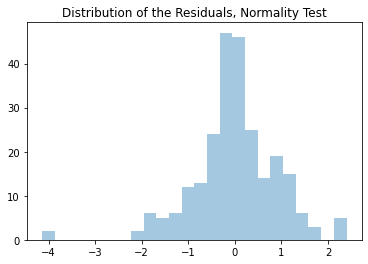

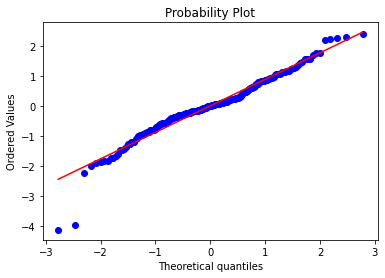

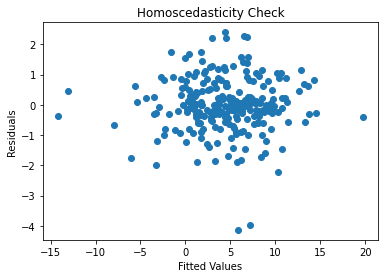

In [10]:
# Various Assumption tests, plots
# Shapiro Wilk Test
print(f'Shapiro-Wilk Test Results: {stats.shapiro(linresid)}')
print("The Shapiro-Wilk test helps prove that the data is normal as the p-value is very low.")

# Historgram to check normality
plt.figure()
sns.distplot(linresid, kde=False)
plt.title("Distribution of the Residuals, Normality Test")
plt.show()

# Q-Q Plot
plt.figure()
stats.probplot(linresid, dist="norm", plot=plt)
plt.show()

# Checking for homoscedasticity in the model
plt.figure()
plt.scatter(linfit, linresid)
plt.title("Homoscedasticity Check")
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

### VIF Calculation
I know that many of the features are correlated with one another as I saw when checking the independence in the EDA, high correlations between features. Here I wanted to try a VIF calculation, to illustrate how multicollinearity is an issue in this analysis. I am not sure if I did this correctly, thus I added it to the bonus section.

In [11]:
# Same variables set up for linreg model
X = df_master.drop(columns=["CountryCode", 'GDP growth (annual %)'])
X = sm.add_constant(X) # Should have 101 features, need to drop CountryCode
y = df_master["GDP growth (annual %)"]
print(X.shape) # Check to see all features in the dataset
print(y.shape)

(250, 101)
(250,)


In [12]:
# Setting up a VIF dataframe to store the VIF Calculation and the Name of the Feature
vif = pd.DataFrame()
vif["VIF Calculation"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif["Features"] = X.columns

C:\Users\Jim\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Jim\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [13]:
vif.sort_values(by="VIF Calculation", ascending=False)

,VIF Calculation,Features
93,inf,"Population ages 15-64, total"
99,inf,"Population, total"
92,inf,"Population ages 0-14, total"
98,9.007199e+15,"Population, male"
95,9.007199e+15,"Population ages 65 and above, total"
97,4.503600e+15,"Population, female"
75,9.007199e+14,Urban population
71,6.433714e+14,Rural population
44,1.317227e+12,Gross national expenditure (current US$)
21,1.199680e+12,Final consumption expenditure (current US$)


Looking at the VIF Calculation of all the features, I can see that some of the features are show a high value, indicating that there is multicollinearity within the features. In order to reduce multicollinearity within my model, I have decided to drop the features with a scientific notation of VIF Calculation >= 1.00 e+10. My reasoning is that anything with more than 1e+10 may improve the model when iterating through the same process again. By removing the highest variance inflation factors, I remove the feature's explanation from the dataset, making my model less multicollinear everytime I do this process. Of course, at some point, I need to stop the iterations and realize that even if multicollinearity is still present within the model, I can deduce good results as the R-Squared, P-Values, and Coefficients all are statistically significant. Interestingly, in the EDA section, I had logically thought about what features would not be useful in my analysis. I kept some demographic features just in case, and the result is me dropping them in the end. I found that by doing a VIF calculation I can statistically prove that these features are not relevant to the analysis. Now, I will drop the columns with the threshold and perform the iterative process two more times. 

In [14]:
# Dropping the features with a VIF Calculation >= 1e+10
df_master = df_master.drop(['Population ages 15-64, total', 'Population, total', 'Population ages 0-14, total',
                            'Population, male', 'Population ages 65 and above, total', 'Population, female',
                            'Urban population', 'Rural population', 'Gross national expenditure (current US$)',
                            'Final consumption expenditure (current US$)', 'Households and NPISHs Final consumption expenditure (current US$)',
                            'Gross capital formation (current US$)', 'General government final consumption expenditure (current US$)'
                           ], axis = 1)
print(f'The shape of the dataframe: {df_master.shape}')
df_master.head(20)

The shape of the dataframe: (250, 89)


,CountryCode,Year,Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: consumption of fixed capital (current US$),Adjusted savings: education expenditure (% of GNI),Adjusted savings: energy depletion (current US$),Adjusted savings: mineral depletion (current US$),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (annual % growth)","Agriculture, forestry, and fishing, value added (constant 2010 US$)","Agriculture, forestry, and fishing, value added (constant LCU)","Agriculture, forestry, and fishing, value added (current LCU)","Agriculture, forestry, and fishing, value added (current US$)",Changes in inventories (current LCU),Changes in inventories (current US$),Exports of goods and services (% of GDP),Exports of goods and services (current US$),External balance on goods and services (% of GDP),External balance on goods and services (current LCU),Final consumption expenditure (% of GDP),GDP (constant 2010 US$),GDP (current US$),GDP growth (annual %),GDP per capita (constant 2010 US$),GDP per capita (constant LCU),GDP per capita (current LCU),GDP per capita (current US$),GNI (current US$),GNI per capita (current LCU),"GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)",General government final consumption expenditure (% of GDP),Gross capital formation (% of GDP),Gross capital formation (current LCU),Gross domestic savings (% of GDP),Gross domestic savings (current LCU),Gross domestic savings (current US$),Gross fixed capital formation (% of GDP),Gross fixed capital formation (current LCU),Gross fixed capital formation (current US$),Gross national expenditure (% of GDP),Households and NPISHs final consumption expenditure (% of GDP),Imports of goods and services (% of GDP),Imports of goods and services (current US$),"Industry (including construction), value added (% of GDP)","Industry (including construction), value added (annual % growth)","Industry (including construction), value added (constant 2010 US$)","Industry (including construction), value added (current LCU)","Industry (including construction), value added (current US$)","Services, value added (% of GDP)",Trade (% of GDP),Aquaculture production (metric tons),CO2 emissions (kt),CO2 emissions (metric tons per capita),CO2 emissions from gaseous fuel consumption (% of total),CO2 emissions from gaseous fuel consumption (kt),CO2 emissions from liquid fuel consumption (% of total),CO2 emissions from solid fuel consumption (% of total),CO2 emissions from solid fuel consumption (kt),Land area (sq. km),Natural gas rents (% of GDP),Population density (people per sq. km of land area),Population in largest city,Population in the largest city (% of urban population),Population in urban agglomerations of more than 1 million,Population in urban agglomerations of more than 1 million (% of total population),Rural population (% of total population),Total fisheries production (metric tons),Total natural resources rents (% of GDP),Urban population (% of total population),Urban population growth (annual %),Merchandise exports (current US$),Merchandise exports by the reporting economy (current US$),"Merchandise exports by the reporting economy, residual (% of total merchandise exports)",Merchandise exports to economies in the Arab World (% of total merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in East Asia & Pacific (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Middle East & North Africa (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports),Merchandise exports to low- and middle-i

By dropping the features with the highest VIF calculations, I have conducted another feature selection with statistical backing. Now I will run the same test to see if the linreg model returns better coefficient and P-Values.

### 2nd Iteration

In [15]:
X = df_master.drop(columns=["CountryCode", 'GDP growth (annual %)'])
X = sm.add_constant(X) # Should have 88 features, need to drop CountryCode
y = df_master["GDP growth (annual %)"]
print(X.shape) # Check to see all features in the dataset
print(y.shape)

(250, 88)
(250,)


In [16]:
# Instantiating the first linreg model with Ordinary Least Squares
linreg = linear_model.OLS(y, X.fillna(X.mean())).fit() #Instantiate model and Fit
linreg.summary() #Summarize results

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     GDP growth (annual %)   R-squared:                       0.960
Model:                               OLS   Adj. R-squared:                  0.945
Method:                    Least Squares   F-statistic:                     65.12
Date:                   Thu, 17 Dec 2020   Prob (F-statistic):           1.21e-98
Time:                           20:57:08   Log-Likelihood:                -331.69
No. Observations:                    250   AIC:                             799.4
Df Residuals:                        182   BIC:                             1039.
Df Model:                             67                                         
Covariance Type:               nonrobust                                         
==========================================================================================================================================================================================
                                                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                      0.0257      0.037      0.700      0.485      -0.047       0.098
Year                                                                                                                       0.0018      0.075      0.024      0.981      -0.147       0.151
Adjusted savings: carbon dioxide damage (current US$)                                                                   9.194e-11   4.67e-11      1.967      0.051   -2.62e-13    1.84e-10
Adjusted savings: consumption of fixed capital (% of GNI)                                                                 -0.1353      0.056     -2.421      0.016      -0.246      -0.025
Adjusted savings: consumption of fixed capital (current US$)                                                            2.496e-12   4.44e-12      0.562      0.575   -6.26e-12    1.13e-11
Adjusted savings: education expenditure (% of GNI)                                                                         0.2860      0.283      1.009      0.314      -0.273       0.845
Adjusted savings: energy depletion (current US$)                                                                       -1.466e-11    1.3e-11     -1.131      0.260   -4.02e-11    1.09e-11
Adjusted savings: mineral depletion (current US$)                                                                       1.248e-11   2.28e-11      0.547      0.585   -3.25e-11    5.75e-11
Agriculture, forestry, and fishing, value added (% of GDP)                                                                -0.0154      0.114     -0.135      0.892      -0.239       0.209
Agriculture, forestry, and fishing, value added (annual % growth)                                                          0.0707      0.012      5.914      0.000       0.047       0.094
Agriculture, forestry, and fishing, value added (constant 2010 US$)                                                    -2.201e-11   2.29e-11     -0.963      0.337   -6.71e-11    2.31e-11
Agriculture, forestry, and fishing, value added (constant LCU)                                                          2.821e-12   7.59e-13      3.716      0.000    1.32e-12    4.32e-12
Agriculture, forestry, and fishing, value added (current LCU)                                                          -7.519e-13   5.68e-13     -1.323      0.187   -1.87e-12    3.69e-13
Agriculture, forestry, and fishing, value added (current U

Immediately noticable is that the R-Squared barely changed and the P-Values are more realistic when implementing the feature selection with the threshold of VIF calculation >= 1e+10. IF I do one more iteration, I should be able to get more values that are more statistically significant of the target: GDP growth (annual %).

In [17]:
# Coefficients of features
linreg.params.sort_values() # Sorting from least to greatest

Population growth (annual %)                                                                                             -1.697727e+00
CO2 emissions from gaseous fuel consumption (% of total)                                                                 -6.348903e-01
CO2 emissions from solid fuel consumption (% of total)                                                                   -6.053860e-01
CO2 emissions from liquid fuel consumption (% of total)                                                                  -5.871910e-01
Population in urban agglomerations of more than 1 million (% of total population)                                        -5.254563e-01
Death rate, crude (per 1,000 people)                                                                                     -4.475682e-01
Population in the largest city (% of urban population)                                                                   -3.842894e-01
Natural gas rents (% of GDP)                           

In [18]:
# P-Values of the features
linreg.pvalues.sort_values() # Sorting from least to greatest

Industry (including construction), value added (annual % growth)                                                          1.144305e-65
Agriculture, forestry, and fishing, value added (annual % growth)                                                         1.618515e-08
Agriculture, forestry, and fishing, value added (constant LCU)                                                            2.690739e-04
Population in largest city                                                                                                2.870716e-04
Exports of goods and services (% of GDP)                                                                                  6.323600e-03
Gross fixed capital formation (% of GDP)                                                                                  7.458678e-03
GDP per capita (constant LCU)                                                                                             7.501288e-03
GDP per capita (constant 2010 US$)                     

In [19]:
# Getting the residuals of the features
linresid = linreg.resid
linresid

0      0.362237
1      1.167819
2      0.923879
3      1.070151
4     -0.171071
5     -1.440036
6     -0.100325
7     -1.060183
8     -4.223536
9      2.169643
10     2.122182
11    -1.206651
12    -0.788816
13    -0.804560
14     0.810506
15     0.974316
16    -0.532652
17    -0.162113
18    -0.232970
19     1.102893
20    -1.025849
21     1.490230
22     0.699501
23    -1.011771
24    -0.985497
25     0.200508
26     1.308883
27    -0.057627
28    -0.067276
29     0.224272
30     0.409263
31    -0.161092
32    -0.756344
33    -0.125741
34    -0.170305
35     0.739251
36     0.665116
37    -0.296166
38     0.092965
39    -0.100148
40    -0.701322
41    -0.878723
42     1.087554
43     0.454620
44     0.398875
45    -0.367873
46    -0.319897
47    -0.229022
48     1.306068
49    -1.424081
50    -0.279028
51    -0.057149
52    -0.011336
53     1.660831
54     0.704495
55    -0.597039
56    -0.867194
57    -1.053715
58     0.777446
59     0.468131
60    -1.400461
61     0.223257
62     1

In [20]:
# The fitted values on the model
linfit = linreg.fittedvalues
linfit

0       8.407711
1      10.127267
2      11.128923
3      12.908540
4       9.213191
5       6.649112
6       9.890735
7       5.666501
8       7.455246
9       4.596642
10      6.988778
11     -3.186706
12      1.369061
13     -2.605233
14      4.458637
15      6.971546
16      8.520948
17      3.761743
18      0.130297
19      2.176566
20     -2.076507
21      0.021707
22     -1.166414
23      5.676940
24      6.320049
25      4.216224
26      0.898653
27      3.452473
28      0.405374
29      0.243666
30      3.978687
31      1.550989
32      3.809806
33      1.266570
34      5.930270
35      2.462880
36      3.296872
37      6.366037
38      5.001230
39     -0.025664
40      8.229548
41      4.853148
42      0.833597
43      2.550227
44      0.105081
45     -3.177890
46     -2.956020
47      1.551891
48      0.011156
49      2.560667
50     19.579028
51      7.117149
52      3.821336
53      6.099169
54      1.605505
55      9.317039
56     -0.702806
57      8.623715
58     10.5488

Shapiro-Wilk Test Results: ShapiroResult(statistic=0.9561043381690979, pvalue=6.940941261746048e-07)
The Shapiro-Wilk test helps prove that the data is normal as the p-value is very low.


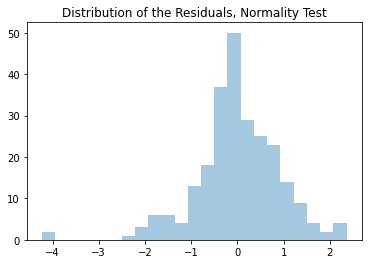

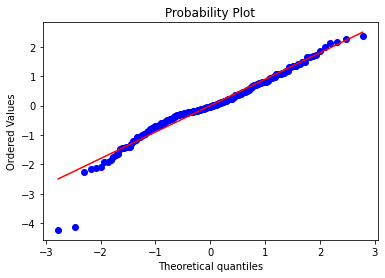

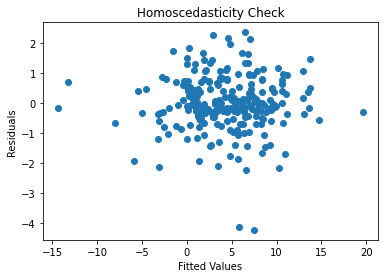

In [21]:
# Various Assumption tests, plots
# Shapiro Wilk Test
print(f'Shapiro-Wilk Test Results: {stats.shapiro(linresid)}')
print("The Shapiro-Wilk test helps prove that the data is normal as the p-value is very low.")

# Historgram to check normality
plt.figure()
sns.distplot(linresid, kde=False)
plt.title("Distribution of the Residuals, Normality Test")
plt.show()

# Q-Q Plot
plt.figure()
stats.probplot(linresid, dist="norm", plot=plt)
plt.show()

# Checking for homoscedasticity in the model
plt.figure()
plt.scatter(linfit, linresid)
plt.title("Homoscedasticity Check")
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

### VIF Calculation 2nd Iteration

In [22]:
# Setting up a VIF dataframe to store the VIF Calculation and the Name of the Feature
vif = pd.DataFrame()
vif["VIF Calculation"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif["Features"] = X.columns

C:\Users\Jim\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [23]:
vif.sort_values(by="VIF Calculation", ascending=False)

,VIF Calculation,Features
50,6.389759e+08,Trade (% of GDP)
42,4.583982e+08,Imports of goods and services (% of GDP)
16,5.648251e+07,Exports of goods and services (% of GDP)
32,4.984146e+06,Gross capital formation (% of GDP)
41,4.356990e+06,Households and NPISHs final consumption expend...
20,3.307966e+06,Final consumption expenditure (% of GDP)
69,3.113113e+06,Urban population (% of total population)
66,2.571453e+06,Rural population (% of total population)
40,1.201410e+06,Gross national expenditure (% of GDP)
31,4.191071e+05,General government final consumption expenditu...


Looking at the VIF calculations and the summary statistics from the linreg model, I debated on whether to accept multicollinearity within the model or to remove the features with a VIF calculation >= 1e+6. Some of the features with a high VIF calculation should be significant to the calculation of GDP growth (annual%) such as Trade, import and export of goods, and gross national expenditure. For the purpose of understand what the model will look like, I performed one more drop to see what the resulting linreg model would produce.

In [24]:
# Dropping the features with a VIF Calculation >= 1e+5
df_master = df_master.drop(['Trade (% of GDP)', 'Imports of goods and services (% of GDP)', 'Exports of goods and services (% of GDP)',
                            'Gross capital formation (% of GDP)', 'Households and NPISHs final consumption expenditure (% of GDP)', 
                            'Final consumption expenditure (% of GDP)', 'Urban population (% of total population)', 
                            'Rural population (% of total population)', 'Gross national expenditure (% of GDP)'
                           ], axis = 1)
print(f'The shape of the dataframe: {df_master.shape}')
df_master.head(20) # Size of 80

The shape of the dataframe: (250, 80)


,CountryCode,Year,Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),Adjusted savings: consumption of fixed capital (current US$),Adjusted savings: education expenditure (% of GNI),Adjusted savings: energy depletion (current US$),Adjusted savings: mineral depletion (current US$),"Agriculture, forestry, and fishing, value added (% of GDP)","Agriculture, forestry, and fishing, value added (annual % growth)","Agriculture, forestry, and fishing, value added (constant 2010 US$)","Agriculture, forestry, and fishing, value added (constant LCU)","Agriculture, forestry, and fishing, value added (current LCU)","Agriculture, forestry, and fishing, value added (current US$)",Changes in inventories (current LCU),Changes in inventories (current US$),Exports of goods and services (current US$),External balance on goods and services (% of GDP),External balance on goods and services (current LCU),GDP (constant 2010 US$),GDP (current US$),GDP growth (annual %),GDP per capita (constant 2010 US$),GDP per capita (constant LCU),GDP per capita (current LCU),GDP per capita (current US$),GNI (current US$),GNI per capita (current LCU),"GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)",General government final consumption expenditure (% of GDP),Gross capital formation (current LCU),Gross domestic savings (% of GDP),Gross domestic savings (current LCU),Gross domestic savings (current US$),Gross fixed capital formation (% of GDP),Gross fixed capital formation (current LCU),Gross fixed capital formation (current US$),Imports of goods and services (current US$),"Industry (including construction), value added (% of GDP)","Industry (including construction), value added (annual % growth)","Industry (including construction), value added (constant 2010 US$)","Industry (including construction), value added (current LCU)","Industry (including construction), value added (current US$)","Services, value added (% of GDP)",Aquaculture production (metric tons),CO2 emissions (kt),CO2 emissions (metric tons per capita),CO2 emissions from gaseous fuel consumption (% of total),CO2 emissions from gaseous fuel consumption (kt),CO2 emissions from liquid fuel consumption (% of total),CO2 emissions from solid fuel consumption (% of total),CO2 emissions from solid fuel consumption (kt),Land area (sq. km),Natural gas rents (% of GDP),Population density (people per sq. km of land area),Population in largest city,Population in the largest city (% of urban population),Population in urban agglomerations of more than 1 million,Population in urban agglomerations of more than 1 million (% of total population),Total fisheries production (metric tons),Total natural resources rents (% of GDP),Urban population growth (annual %),Merchandise exports (current US$),Merchandise exports by the reporting economy (current US$),"Merchandise exports by the reporting economy, residual (% of total merchandise exports)",Merchandise exports to economies in the Arab World (% of total merchandise exports),Merchandise exports to high-income economies (% of total merchandise exports),Merchandise exports to low- and middle-income economies in East Asia & Pacific (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Middle East & North Africa (% of total merchandise exports),Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports),Merchandise exports to low- and middle-income economies within region (% of total merchandise exports),Merchandise imports (current US$),Merchandise trade (% of GDP),"Age dependency ratio, old (% of working-age population)","Death rate, crude (per 1,000 people)",Population ages 65 and above (% of total population),Population growth (annual %),"Survival to age 65, male (% of cohort)"
0,BRA,1970,1

### 3rd Iteration

In [25]:
X = df_master.drop(columns=["CountryCode", 'GDP growth (annual %)']) # Drop 2 add 1 constant column
X = sm.add_constant(X) # Should have 79 features, need to drop CountryCode
y = df_master["GDP growth (annual %)"]
print(X.shape) # Check to see all features in the dataset
print(y.shape)

(250, 79)
(250,)


In [26]:
# Instantiating the first linreg model with Ordinary Least Squares
linreg = linear_model.OLS(y, X.fillna(X.mean())).fit() #Instantiate model and Fit
linreg.summary() #Summarize results

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     GDP growth (annual %)   R-squared:                       0.959
Model:                               OLS   Adj. R-squared:                  0.944
Method:                    Least Squares   F-statistic:                     64.49
Date:                   Thu, 17 Dec 2020   Prob (F-statistic):           2.02e-98
Time:                           20:57:11   Log-Likelihood:                -335.32
No. Observations:                    250   AIC:                             804.6
Df Residuals:                        183   BIC:                             1041.
Df Model:                             66                                         
Covariance Type:               nonrobust                                         
==========================================================================================================================================================================================
                                                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                     -0.0023      0.002     -1.177      0.241      -0.006       0.002
Year                                                                                                                       0.0395      0.016      2.528      0.012       0.009       0.070
Adjusted savings: carbon dioxide damage (current US$)                                                                   1.123e-10   4.53e-11      2.480      0.014    2.29e-11    2.02e-10
Adjusted savings: consumption of fixed capital (% of GNI)                                                                 -0.1238      0.055     -2.240      0.026      -0.233      -0.015
Adjusted savings: consumption of fixed capital (current US$)                                                             6.68e-13    4.3e-12      0.155      0.877   -7.82e-12    9.16e-12
Adjusted savings: education expenditure (% of GNI)                                                                         0.4171      0.269      1.553      0.122      -0.113       0.947
Adjusted savings: energy depletion (current US$)                                                                       -1.489e-11   1.28e-11     -1.166      0.245   -4.01e-11    1.03e-11
Adjusted savings: mineral depletion (current US$)                                                                        7.18e-12   2.28e-11      0.316      0.753   -3.77e-11    5.21e-11
Agriculture, forestry, and fishing, value added (% of GDP)                                                                -0.0638      0.111     -0.576      0.565      -0.282       0.155
Agriculture, forestry, and fishing, value added (annual % growth)                                                          0.0729      0.012      6.093      0.000       0.049       0.097
Agriculture, forestry, and fishing, value added (constant 2010 US$)                                                    -3.985e-11    2.1e-11     -1.897      0.059   -8.13e-11    1.61e-12
Agriculture, forestry, and fishing, value added (constant LCU)                                                          3.392e-12   7.01e-13      4.838      0.000    2.01e-12    4.78e-12
Agriculture, forestry, and fishing, value added (current LCU)                                                          -1.136e-12   5.05e-13     -2.249      0.026   -2.13e-12    -1.4e-13
Agriculture, forestry, and fishing, value added (current U

In [27]:
# Coefficients of features
linreg.params.sort_values() # Sorting from least to greatest

Population growth (annual %)                                                                                             -1.007886e+00
Population in the largest city (% of urban population)                                                                   -8.239382e-01
CO2 emissions from solid fuel consumption (% of total)                                                                   -5.952885e-01
CO2 emissions from liquid fuel consumption (% of total)                                                                  -5.646525e-01
CO2 emissions from gaseous fuel consumption (% of total)                                                                 -5.550367e-01
Natural gas rents (% of GDP)                                                                                             -2.750062e-01
Gross fixed capital formation (% of GDP)                                                                                 -2.608787e-01
Death rate, crude (per 1,000 people)                   

In [28]:
# P-Values of the features
linreg.pvalues.sort_values() # Sorting from least to greatest

Industry (including construction), value added (annual % growth)                                                          2.380756e-66
Agriculture, forestry, and fishing, value added (annual % growth)                                                         6.392824e-09
Agriculture, forestry, and fishing, value added (constant LCU)                                                            2.779752e-06
Gross fixed capital formation (% of GDP)                                                                                  9.276017e-04
Population in largest city                                                                                                1.357780e-03
External balance on goods and services (% of GDP)                                                                         2.034400e-03
GDP per capita (constant 2010 US$)                                                                                        2.412124e-03
Population density (people per sq. km of land area)    

In [29]:
# Getting the residuals of the features
linresid = linreg.resid
linresid

0      0.461987
1      1.270118
2      0.992813
3      1.142993
4     -0.312541
5     -1.428672
6     -0.143223
7     -0.985636
8     -4.442656
9      1.845450
10     1.650629
11    -1.440683
12    -1.058160
13    -0.802794
14     0.975747
15     1.125784
16    -0.453456
17     0.088343
18     0.169060
19     1.304803
20    -1.139010
21     1.346513
22     0.862837
23    -0.933051
24    -0.739008
25     0.120806
26     1.346410
27     0.039478
28    -0.041343
29     0.277246
30     0.472852
31    -0.244227
32    -0.882521
33    -0.114586
34    -0.225578
35     0.701194
36     0.629848
37    -0.242822
38     0.211058
39    -0.009057
40    -0.663238
41    -0.690142
42     1.240568
43     0.561906
44     0.338023
45    -0.642696
46    -0.881689
47    -0.273882
48     1.314042
49    -1.204924
50    -0.376710
51    -0.182379
52    -0.273457
53     1.559084
54     0.713799
55    -0.422507
56    -0.633219
57    -0.945838
58     0.291916
59     0.336822
60    -1.454701
61     0.380912
62     1

In [30]:
# The fitted values on the model
linfit = linreg.fittedvalues
linfit

0       8.307961
1      10.024969
2      11.059989
3      12.835698
4       9.354661
5       6.637748
6       9.933634
7       5.591954
8       7.674366
9       4.920835
10      7.460331
11     -2.952674
12      1.638406
13     -2.607000
14      4.293396
15      6.820078
16      8.441751
17      3.511286
18     -0.271733
19      1.974655
20     -1.963346
21      0.165424
22     -1.329751
23      5.598220
24      6.073560
25      4.295926
26      0.861126
27      3.355368
28      0.379441
29      0.190692
30      3.915097
31      1.634123
32      3.935983
33      1.255415
34      5.985543
35      2.500937
36      3.332141
37      6.312693
38      4.883137
39     -0.116755
40      8.191464
41      4.664568
42      0.680582
43      2.442941
44      0.165933
45     -2.903067
46     -2.394228
47      1.596751
48      0.003182
49      2.341509
50     19.676710
51      7.242379
52      4.083457
53      6.200916
54      1.596201
55      9.142507
56     -0.936781
57      8.515838
58     11.0343

Shapiro-Wilk Test Results: ShapiroResult(statistic=0.9548524618148804, pvalue=4.987842885384453e-07)
The Shapiro-Wilk test helps prove that the data is normal as the p-value is very low.


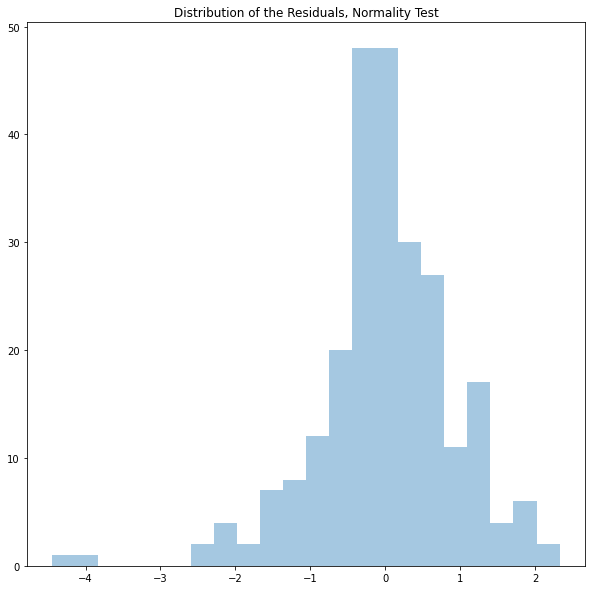

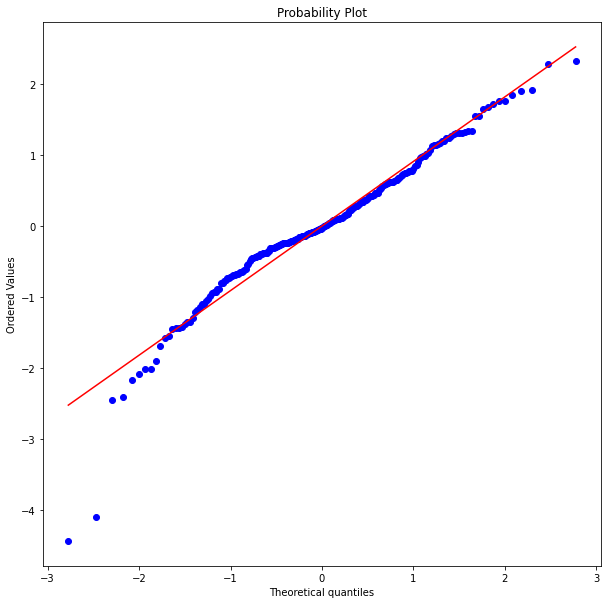

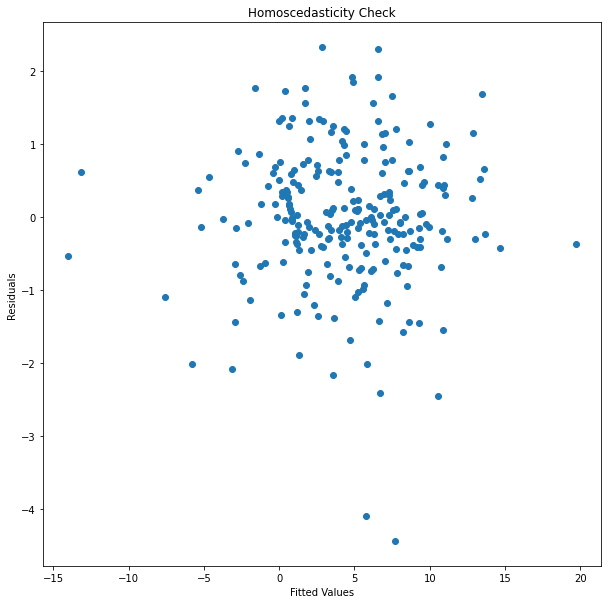

In [31]:
# Various Assumption tests, plots
# Shapiro Wilk Test
print(f'Shapiro-Wilk Test Results: {stats.shapiro(linresid)}')
print("The Shapiro-Wilk test helps prove that the data is normal as the p-value is very low.")

# Historgram to check normality
plt.figure(figsize=(10,10))
sns.distplot(linresid, kde=False)
plt.title("Distribution of the Residuals, Normality Test")
plt.show()

# Q-Q Plot
plt.figure(figsize=(10,10))
stats.probplot(linresid, dist="norm", plot=plt)
plt.show()

# Checking for homoscedasticity in the model
plt.figure(figsize=(10,10))
plt.scatter(linfit, linresid)
plt.title("Homoscedasticity Check")
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

After completing the third iteration to this process, I was able to arrive at a linear regression model that provided me with useful information for understanding which features are statistically significant with the target: GDP growth (annual %). While maintaining a high R-squared score of 0.959, the iteration process worked in identify what features are statistically significant. Further, by iterating through the process, I was able to pass all the assumptions shown in the graphs above as the data is normally distributed, plotted along the Q-Q plot, and the residuals are homoscedastic. Now, I will list the features that were statistically significant according to my hypothesis is the P-Value was less than or equal to 0.1.

Statistically Significant P =< 0.1:
Year, Adjusted savings: carbon dioxide damage (current US$), Adjusted savings: consumption of fixed capital (% of GNI), Agriculture, forestry, and fishing, value added (annual % growth), Agriculture, forestry, and fishing, value added (constant 2010 US$), Agriculture, forestry, and fishing, value added (constant LCU), Agriculture, forestry, and fishing, value added (current LCU), External balance on goods and services (% of GDP), GDP per capita (constant 2010 US$), GDP per capita (constant LCU), GDP per capita (current LCU), GDP per capita (current US$), GNI per capita (current LCU), Gross domestic savings (% of GDP), Gross fixed capital formation (% of GDP), Industry (including construction), value added (annual % growth), Industry (including construction), value added (constant 2010 US$), Industry (including construction), value added (current LCU), Services, value added (% of GDP), CO2 emissions from gaseous fuel consumption (% of total), CO2 emissions from liquid fuel consumption (% of total), CO2 emissions from solid fuel consumption (% of total), Population density (people per sq. km of land area), Population in largest city, Population in the largest city (% of urban population), Population in urban agglomerations of more than 1 million, Total natural resources rents (% of GDP), Merchandise exports to low- and middle-income economies in Middle East & North Africa (% of total merchandise exports) 
   
Not Statistically Significant P >= 0.1:

Adjusted savings: consumption of fixed capital (current US$), Adjusted savings: education expenditure (% of GNI), Adjusted savings: energy depletion (current US$), Adjusted savings: mineral depletion (current US$), Agriculture, forestry, and fishing, value added (% of GDP), Agriculture, forestry, and fishing, value added (current US$), Changes in inventories (current LCU), Changes in inventories (current US$), Exports of goods and services (current US$), External balance on goods and services (current LCU), GDP (constant 2010 US$), GDP (current US$), GNI (current US$), GNI per capita, Atlas method (current US$), GNI, Atlas method (current US$), General government final consumption expenditure (% of GDP), Gross capital formation (current LCU), Gross domestic savings (current LCU), Gross domestic savings (current US$), Gross fixed capital formation (current LCU), Gross fixed capital formation (current US$), Imports of goods and services (current US$), Industry (including construction), value added (% of GDP), Industry (including construction), value added (current US$), Aquaculture production (metric tons), CO2 emissions (kt), CO2 emissions (metric tons per capita), CO2 emissions from gaseous fuel consumption (kt), CO2 emissions from solid fuel consumption (kt), Land area (sq. km), Natural gas rents (% of GDP), Population in urban agglomerations of more than 1 million (% of total population), Total fisheries production (metric tons), Urban population growth (annual %), Merchandise exports (current US$), Merchandise exports by the reporting economy (current US$), Merchandise exports by the reporting economy, residual (% of total merchandise exports), Merchandise exports to economies in the Arab World (% of total merchandise exports), Merchandise exports to high-income economies (% of total merchandise exports), Merchandise exports to low- and middle-income economies in East Asia & Pacific (% of total merchandise exports), Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports), Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports), Merchandise exports to low- and middle-income economies within region (% of total merchandise exports), Merchandise imports (current US$), Merchandise trade (% of GDP), Age dependency ratio, old (% of working-age population), Death rate, crude (per 1,000 people), Population ages 65 and above (% of total population), Population growth (annual %), Survival to age 65, male (% of cohort)


With the list above, I can create a new dataframe that does not include any of the features that are not statistically significant according to the P-Value threshold we set before. I will now perform a drop to show what the new dataframe looks like.

In [32]:
# Dropping the features that are not statistically significant P-Value >= 0.1
df_master = df_master.drop(['Adjusted savings: consumption of fixed capital (current US$)', 'Adjusted savings: education expenditure (% of GNI)', 
                            'Adjusted savings: energy depletion (current US$)', 'Adjusted savings: mineral depletion (current US$)', 
                            'Agriculture, forestry, and fishing, value added (% of GDP)', 'Agriculture, forestry, and fishing, value added (current US$)', 
                            'Changes in inventories (current LCU)', 'Changes in inventories (current US$)', 'Exports of goods and services (current US$)', 
                            'External balance on goods and services (current LCU)', 'GDP (constant 2010 US$)', 'GDP (current US$)', 'GNI (current US$)', 
                            'GNI per capita, Atlas method (current US$)', 'GNI, Atlas method (current US$)', 'General government final consumption expenditure (% of GDP)', 
                            'Gross capital formation (current LCU)', 'Gross domestic savings (current LCU)', 'Gross domestic savings (current US$)', 'Gross fixed capital formation (current LCU)',
                            'Gross fixed capital formation (current US$)', 'Imports of goods and services (current US$)', 'Industry (including construction), value added (% of GDP)', 
                            'Industry (including construction), value added (current US$)', 'Aquaculture production (metric tons)', 'CO2 emissions (kt)', 
                            'CO2 emissions (metric tons per capita)', 'CO2 emissions from gaseous fuel consumption (kt)', 'CO2 emissions from solid fuel consumption (kt)', 
                            'Land area (sq. km)', 'Natural gas rents (% of GDP)', 'Population in urban agglomerations of more than 1 million (% of total population)', 
                            'Total fisheries production (metric tons)', 'Urban population growth (annual %)', 'Merchandise exports (current US$)', 
                            'Merchandise exports by the reporting economy (current US$)', 'Merchandise exports by the reporting economy, residual (% of total merchandise exports)',
                            'Merchandise exports to economies in the Arab World (% of total merchandise exports)', 'Merchandise exports to high-income economies (% of total merchandise exports)', 
                            'Merchandise exports to low- and middle-income economies in East Asia & Pacific (% of total merchandise exports)', 'Merchandise exports to low- and middle-income economies in Europe & Central Asia (% of total merchandise exports)', 
                            'Merchandise exports to low- and middle-income economies in Sub-Saharan Africa (% of total merchandise exports)', 'Merchandise exports to low- and middle-income economies within region (% of total merchandise exports)',
                            'Merchandise imports (current US$)', 'Merchandise trade (% of GDP)', 'Age dependency ratio, old (% of working-age population)', 
                            'Death rate, crude (per 1,000 people)', 'Population ages 65 and above (% of total population)', 'Population growth (annual %)', 'Survival to age 65, male (% of cohort)'
                           ], axis = 1)
print(f'The shape of the dataframe: {df_master.shape}')
df_master.head(20) # Should be 28 + 2 (CountryCode/Target)

The shape of the dataframe: (250, 30)


,CountryCode,Year,Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),"Agriculture, forestry, and fishing, value added (annual % growth)","Agriculture, forestry, and fishing, value added (constant 2010 US$)","Agriculture, forestry, and fishing, value added (constant LCU)","Agriculture, forestry, and fishing, value added (current LCU)",External balance on goods and services (% of GDP),GDP growth (annual %),GDP per capita (constant 2010 US$),GDP per capita (constant LCU),GDP per capita (current LCU),GDP per capita (current US$),GNI per capita (current LCU),Gross domestic savings (% of GDP),Gross fixed capital formation (% of GDP),"Industry (including construction), value added (annual % growth)","Industry (including construction), value added (constant 2010 US$)","Industry (including construction), value added (current LCU)","Services, value added (% of GDP)",CO2 emissions from gaseous fuel consumption (% of total),CO2 emissions from liquid fuel consumption (% of total),CO2 emissions from solid fuel consumption (% of total),Population density (people per sq. km of land area),Population in largest city,Population in the largest city (% of urban population),Population in urban agglomerations of more than 1 million,Total natural resources rents (% of GDP),Merchandise exports to low- and middle-income economies in Middle East & North Africa (% of total merchandise exports)
0,BRA,1970,1.555186e+08,9.017633,0.999980,2.195773e+10,3.862805e+10,0.007330,-0.420323,8.769947,4704.317561,8275.835454,7.430000e-10,445.023101,7.320000e-10,20.121715,18.833851,8.892189,1.263890e+11,0.022741,41.471836,0.164261,83.526927,9.503696,11.379717,7620490,14.330458,26447534,1.640319,1.590727
1,BRA,1971,1.842334e+08,9.085182,10.156633,2.418790e+10,4.255136e+10,0.010416,-1.724667,11.295087,5108.403386,8986.703236,9.700000e-10,504.749516,9.600000e-10,19.393242,19.772864,11.842876,1.413570e+11,0.030945,41.915429,0.242953,84.886920,8.760585,11.663231,8004335,14.432124,27673639,1.406689,1.791621
2,BRA,1972,2.205824e+08,9.310639,3.969819,2.514812e+10,4.424057e+10,0.013975,-1.584900,12.052802,5587.886256,9830.209501,1.260000e-09,586.214405,1.250000e-09,19.585920,20.295593,14.341218,1.616290e+11,0.041337,41.370567,0.240485,85.522814,8.202136,11.947560,8380068,14.498987,28906820,1.395499,1.874841
3,BRA,1973,2.775798e+08,9.691598,0.030057,2.515568e+10,4.425386e+10,0.020204,-1.229903,13.978692,6219.514016,10941.369060,1.730000e-09,775.273300,1.710000e-09,22.014181,21.476564,17.131530,1.893180e+11,0.058996,40.820765,0.285137,87.163303,6.807297,12.234719,8772332,14.575654,30198715,1.495735,3.592470
4,BRA,1974,3.374990e+08,9.837892,0.989973,2.540471e+10,4.469197e+10,0.029135,-5.870609,9.042120,6623.415508,11651.912560,2.480000e-09,1004.104910,2.460000e-09,19.518079,22.813361,8.348298,2.051230e+11,0.090341,40.862632,0.483116,87.091332,6.656272,12.527452,9183536,14.660459,31558047,1.919859,7.451483
5,BRA,1975,4.002313e+08,10.353115,7.210006,2.723639e+10,4.791426e+10,0.039036,-3.967007,5.209076,6805.298288,11971.880750,3.410000e-09,1153.830958,3.360000e-09,22.871865,24.364967,4.780029,2.149280e+11,0.129617,42.140691,0.516702,85.874391,7.323581,12.827759,9614016,14.750930,32986816,2.116722,7.050906
6,BRA,1976,4.464043e+08,10.562495,2.440066,2.790098e+10,4.908340e+10,0.067842,-2.396904,9.790410,7296.347484,12835.734490,5.390000e-09,1390.624975,5.310000e-09,20.719306,22.490140,11.712752,2.401020e+11,0.207173,41.648657,0.590863,85.280424,7.430692,13.135810,10065309,14.847688,34491112,1.949831,4.089774
7,BRA,1977,5.129387e+08,10.467414,12.129788,3.128531e+10,5.503711e+10,0.117108,-0.665379,4.606318,7453.590172,13112.355830,8.060000e-09,1567.006182,7.920000e-09,21.403764,21.366446,3.106843,2.475620e+11,0.308388,41.132382,0.695320,83.089559,9.246175,13.451006,10536457,14.949919,36068791,1.779122,4.237506
8,BRA,1978,6.139444e+08,10.731192,-2.774089,3.041742e+10,5.351033e+10,0.135527,-1.188815,3.231710,7514.289263,13219.137

In [33]:
# Creating a CSV file for the most important features on target variable
df_master.to_csv(r'C:\Users\Jim\Desktop\df_answer.csv')

### Visualizing Correlation Matrix and Linear Regression Model

Now that I have found the underlying features that are statistically significant with the target: GDP growth (annual %), I can visualize the features to elaborate on each one. I will first look at the correlation matrix and see how the VIF calculation did. Then, I will create a linear regression graph to illustrate all of the different correlations with GDP growth (annual %).

In [34]:
# Looking at the correlation matrix for df_master after VIF calculation
corrMatrix = df_master.corr()
df_master.corr()

,Year,Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),"Agriculture, forestry, and fishing, value added (annual % growth)","Agriculture, forestry, and fishing, value added (constant 2010 US$)","Agriculture, forestry, and fishing, value added (constant LCU)","Agriculture, forestry, and fishing, value added (current LCU)",External balance on goods and services (% of GDP),GDP growth (annual %),GDP per capita (constant 2010 US$),GDP per capita (constant LCU),GDP per capita (current LCU),GDP per capita (current US$),GNI per capita (current LCU),Gross domestic savings (% of GDP),Gross fixed capital formation (% of GDP),"Industry (including construction), value added (annual % growth)","Industry (including construction), value added (constant 2010 US$)","Industry (including construction), value added (current LCU)","Services, value added (% of GDP)",CO2 emissions from gaseous fuel consumption (% of total),CO2 emissions from liquid fuel consumption (% of total),CO2 emissions from solid fuel consumption (% of total),Population density (people per sq. km of land area),Population in largest city,Population in the largest city (% of urban population),Population in urban agglomerations of more than 1 million,Total natural resources rents (% of GDP),Merchandise exports to low- and middle-income economies in Middle East & North Africa (% of total merchandise exports)
Year,1.000000,0.454235,0.078430,0.009562,0.379293,0.280945,0.414904,-0.004600,-0.003509,0.280258,0.086746,0.292625,0.538993,0.294527,0.117643,0.163060,-0.061707,0.419137,0.520305,0.575932,0.248813,-0.134575,-0.053216,0.177961,0.592647,0.007572,0.428639,0.013407,-0.234515
Adjusted savings: carbon dioxide damage (current US$),0.454235,1.000000,0.308197,0.040719,0.820866,0.273750,0.330099,0.095696,0.240565,0.012602,0.026689,0.111649,0.267550,0.113969,0.605341,0.691677,0.185245,0.930960,0.625613,0.063810,0.018533,-0.256486,0.150665,0.177293,0.511099,-0.417290,0.805608,-0.051090,-0.063759
Adjusted savings: consumption of fixed capital (% of GNI),0.078430,0.308197,1.000000,-0.225829,0.061240,-0.106546,-0.073076,0.441791,-0.456846,0.330720,0.444136,0.090052,0.217311,0.090160,0.352882,0.118907,-0.429559,0.302105,0.104765,0.210912,0.423237,-0.150113,-0.093346,-0.313488,-0.046496,-0.008412,0.031595,0.245639,-0.196975
"Agriculture, forestry, and fishing, value added (annual % growth)",0.009562,0.040719,-0.225829,1.000000,0.095977,0.028610,0.038966,-0.040016,0.362512,-0.073774,-0.147954,-0.061983,-0.061905,-0.061831,0.041678,0.068626,0.231392,0.040837,0.014351,-0.078347,-0.140036,0.028382,0.041012,0.068651,0.067827,-0.040805,0.096787,-0.006179,0.095381
"Agriculture, forestry, and fishing, value added (constant 2010 US$)",0.379293,0.820866,0.061240,0.095977,1.000000,0.525199,0.482157,-0.144877,0.468383,-0.384588,-0.225345,-0.090203,-0.052809,-0.087543,0.638586,0.823014,0.415742,0.836219,0.597551,-0.246682,-0.215453,-0.272915,0.275997,0.519391,0.653131,-0.737100,0.988259,-0.229100,0.136198
"Agriculture, forestry, and fishing, value added (constant LCU)",0.280945,0.273750,-0.106546,0.028610,0.525199,1.000000,0.836880,-0.276331,0.220866,-0.508633,0.017020,0.097435,-0.229643,0.100275,0.186895,0.408504,0.185991,0.205321,0.663650,-0.209478,-0.026204,-0.233044,0.181473,0.913884,0.582950,-0.543823,0.528245,-0.158954,0.214677
"Agriculture, forestry, and fishing, value added (current LCU)",0.414904,0.330099,-0.073076,0.038966,0.482157,0.836880,1.000000,-0.240288,0.180989,-0.244943,0.012821,0.170191,-0.046201,0.173541,0.226474,0.370741,0.117736,0.268178,0.822995,0.024282,-0.047133,-0.137377,0.114907,0.673685,0.615165,-0.299014,0.495066,-0.135718,0.109454
External balance on goods and services (% of GDP),-0.004600,0.095696,0.441791,-0.040016,-0.144877,-0.276331,-0.240288,1.000000,-0.220557,0.417765,0.657267,0.425962,0.320331,0.425191,0.334932,-0.172127,-0.202094,0.091908,0.055689,0.187610,0.626040,-0.178173,-0.165930,-0.492048,-0.224370,0.07

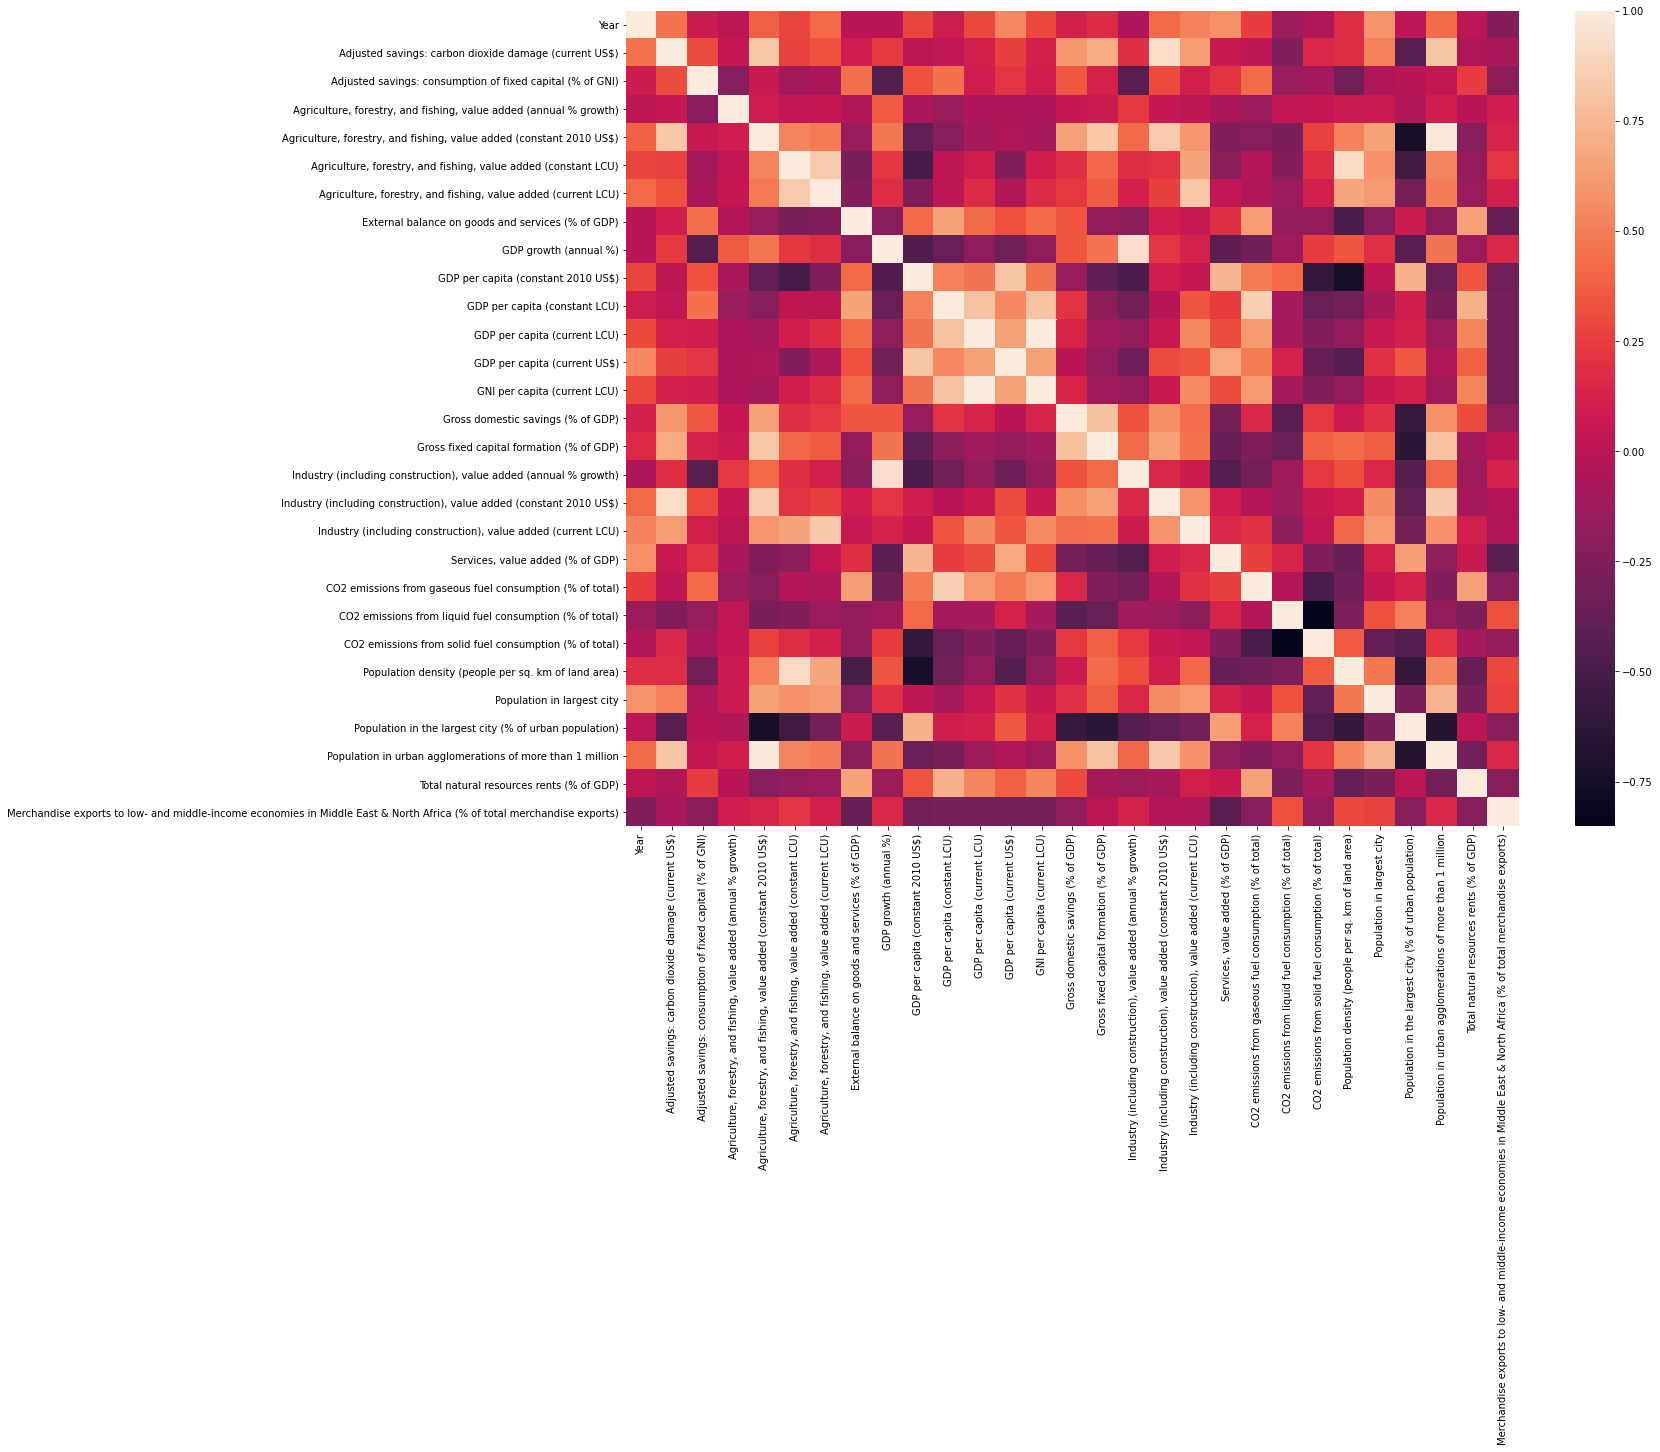

In [35]:
# Creating the heatmap to see how the VIF calculation and iterative process did.
plt.figure(figsize=(20,15))
sns.heatmap(corrMatrix)
plt.show() # Using red as 0, seemed a bit confusing to me so I made another correlation matrix

I do not like how seaborn naturally color codes the different correlations with purple, red, and orange. Thus, I searched online for a better color palette that could define my correlation matrix better.

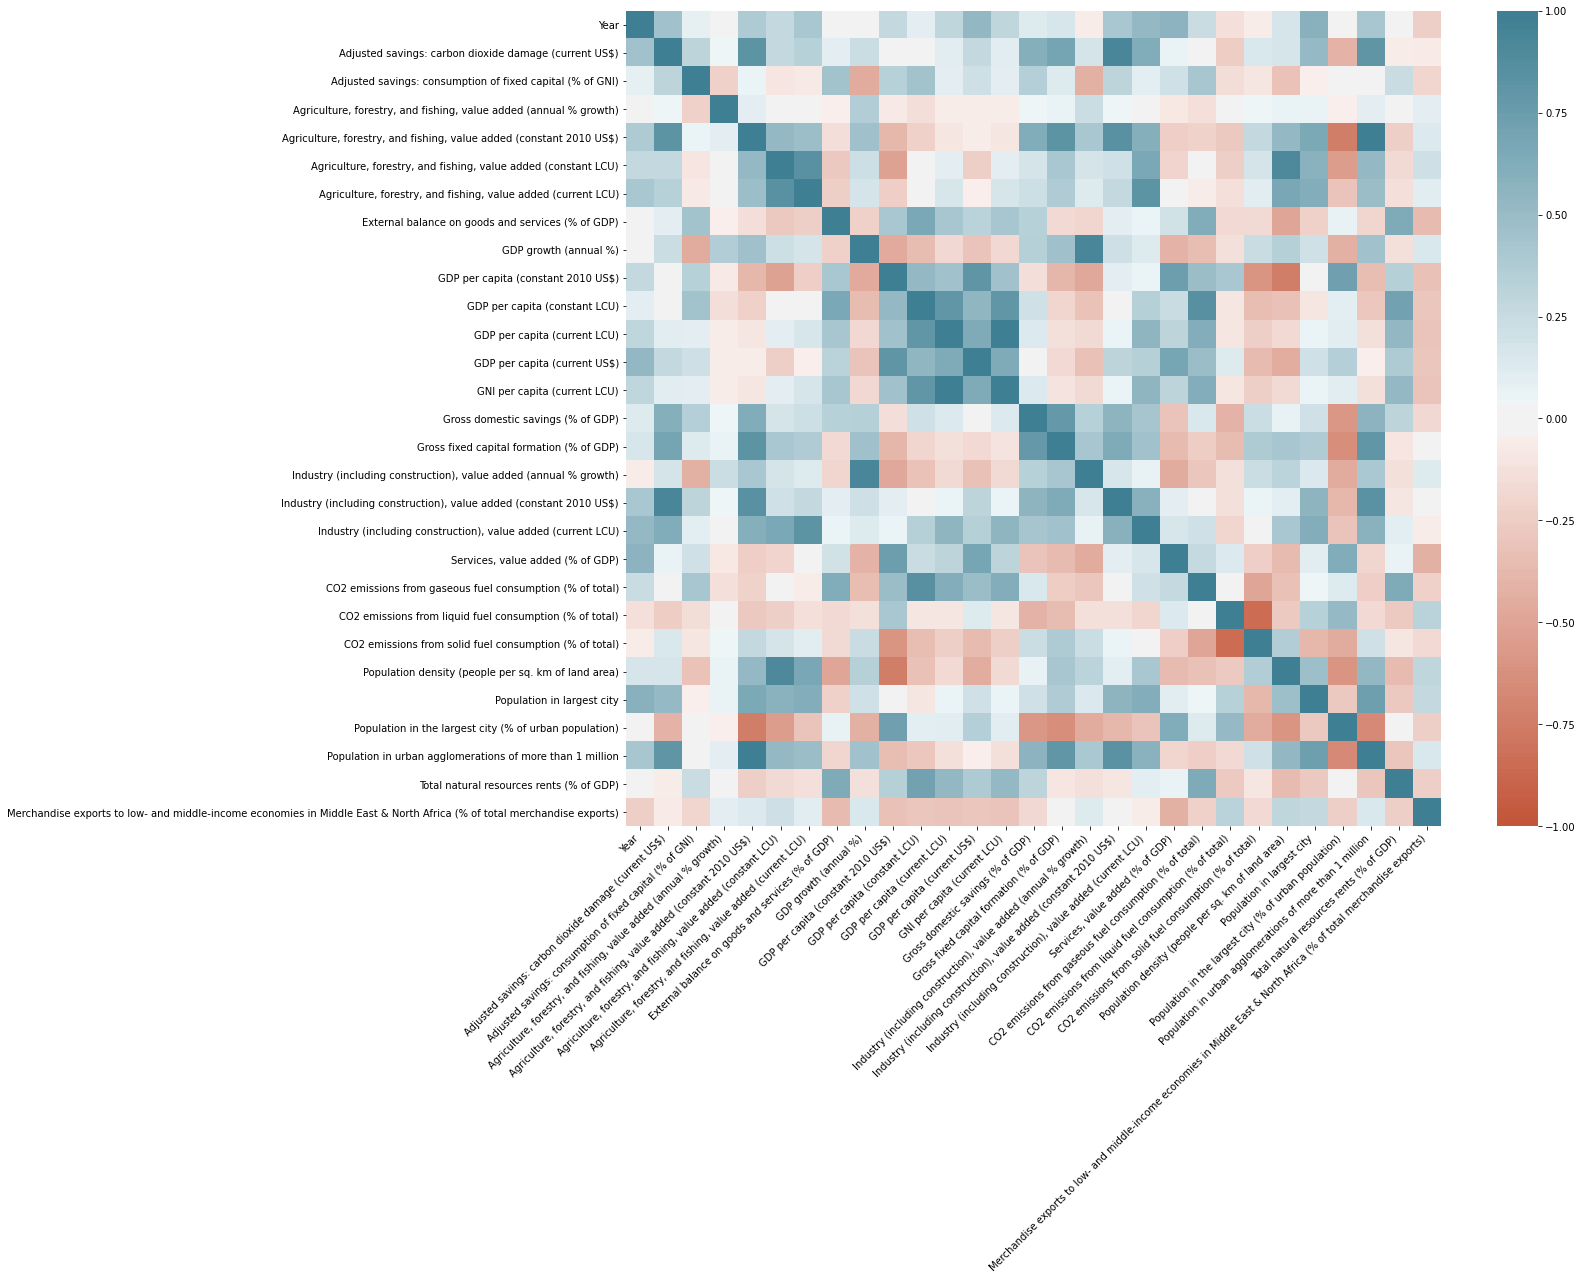

In [36]:
# Comparing a heatmap with the X and Y labels rotated and a different color palette
plt.figure(figsize=(20,15))
ax = sns.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
) 
plt.show()# I tested different rotations and color palettes to see what would look the best

With the correlation matrix above, I can see that the VIF calculation did a good job in reducing the multicollinearity within the dataset. There does not seem to be as many features that are highly correlated with one another, besides the diagonal line that compares the correlations between the same features in the matrix. Now, I will visualize the features that had a high correlation using a bar chart.

In [37]:
# Creating a variable to store all the correlations on the target variable
master_corr = df_master.corr()
y = master_corr["GDP growth (annual %)"].sort_values(ascending=False)
y

GDP growth (annual %)                                                                                                     1.000000
Industry (including construction), value added (annual % growth)                                                          0.936227
Agriculture, forestry, and fishing, value added (constant 2010 US$)                                                       0.468383
Gross fixed capital formation (% of GDP)                                                                                  0.460985
Population in urban agglomerations of more than 1 million                                                                 0.458990
Agriculture, forestry, and fishing, value added (annual % growth)                                                         0.362512
Gross domestic savings (% of GDP)                                                                                         0.348736
Population density (people per sq. km of land area)                                

In [38]:
# Checking the index and values to make sure they are the same
print(f'The shape of the correlation index: {y.index.shape}')
print(f'The shape of the correlation values: {y.values.shape}')

The shape of the correlation index: (29,)
The shape of the correlation values: (29,)


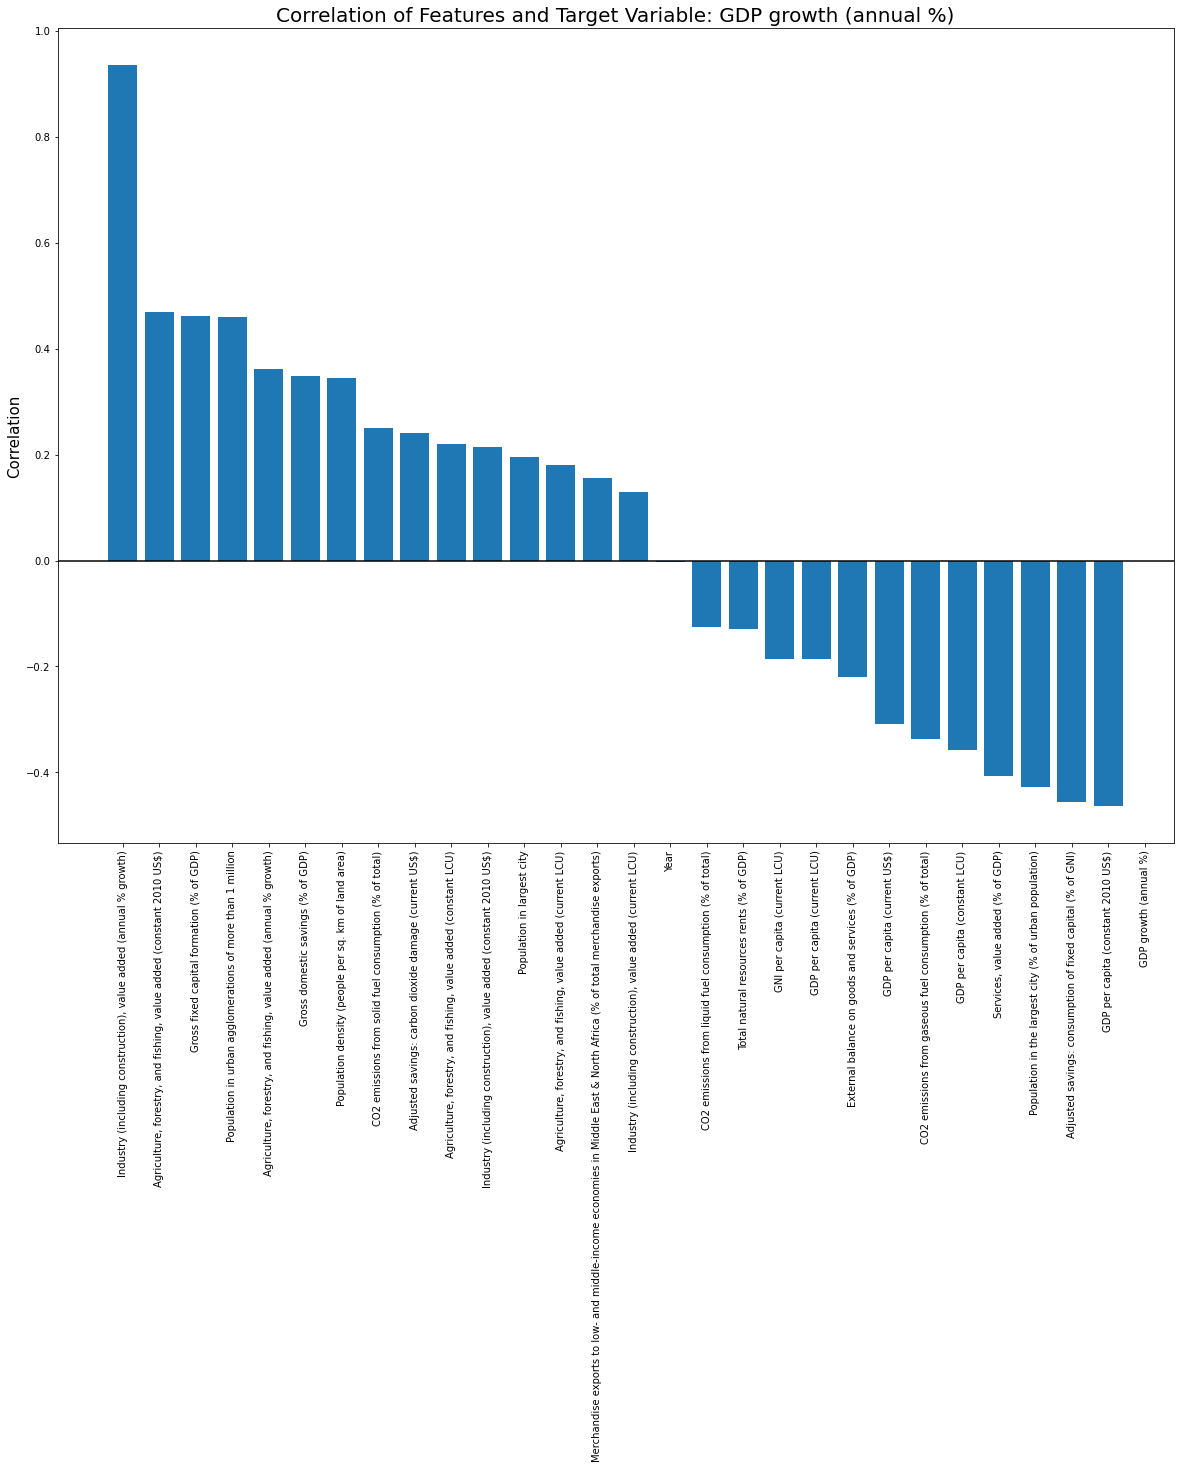

In [42]:
plt.figure(figsize=(20,15))
plt.bar(y.index [1:], y.values[1:]) # Slicing out the GDP Growth (annual %) using position
plt.title("Correlation of Features and Target Variable: GDP growth (annual %)", size=20)
plt.axhline(y=0, color="black")
plt.ylabel("Correlation", size = 15)
plt.xticks(y.index, rotation='vertical') # For some reason, I could not set the rotation to an angle as the positioning looked bad
plt.show() # I believe this has something to do with how xticks rotates the labels. I went with vertical as it worked.

Above, I have visualized both the correlation matrix and a bar chart to show how correlated the 28 features are with the target: GDP growth (annual percent). I can deduce that the Industry (including construction), value added (annual percent growth), Agriculture, forestry, and fishing, value added (constant 2010 US), and Gross fixed capital formation are have the highest correlation with the target. On the other hand, the features with the highest negative correlation are GDP per capita (constant 2010 US), Adjusted savings: consumption of fixed capital (percent of GNI), and Population in the largest city (percent of urban population). Next, I will create a linear regression model using sklearn linear_model package, to return the mean squared error and coefficient of determination.

In [43]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
X = df_master.drop(columns=["CountryCode", 'GDP growth (annual %)']) # Drop the countrycode and target
y = df_master["GDP growth (annual %)"] # Only the target
print(X.shape) # Check to see all features in the dataset
print(y.shape)

(250, 28)
(250,)


In [44]:
# Normally, to split the training and test sets I would perform a simple method from the sklearn.model_selection library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #Tested for different test_sizes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(200, 28)
(200,)
(50, 28)
(50,)


In [45]:
# Creating the linear regression model and returning the Coefficients, MSE, and Coefficient of determination
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('Coefficients: \n', regr.coef_)
print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')
print(f'Coefficient of determination: {r2_score(y_test, y_pred)}')

Coefficients: 
 [ 4.60894056e-03  1.15405601e-11 -9.61750251e-02  8.13000268e-02
 -7.92644292e-13  1.21591675e-12 -3.51278883e-13 -1.14859295e-01
  6.93608557e-04 -1.13639976e-05 -7.70282189e-05 -6.43564825e-06
  7.32105587e-05  1.13348201e-01 -2.29283045e-01  5.73620552e-01
 -3.60044160e-12  1.47308288e-13  3.43411966e-03 -1.95578845e-01
 -2.22055177e-01 -2.49541118e-01 -2.11212694e-02 -6.62416682e-07
 -7.52335385e-03  6.08218739e-08  6.72008723e-02  1.66308724e-01]
Mean squared error: 1.1262333138877554
Coefficient of determination: 0.9212569288687188


In [46]:
# Normally, to split the training and test sets I would perform a simple method from the sklearn.model_selection library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #Tested for different test_sizes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(175, 28)
(175,)
(75, 28)
(75,)


In [47]:
# Creating the linear regression model and returning the Coefficients, MSE, and Coefficient of determination
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('Coefficients: \n', regr.coef_)
print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')
print(f'Coefficient of determination: {r2_score(y_test, y_pred)}')

Coefficients: 
 [ 3.10412781e-02  1.55116421e-11 -1.24354605e-01  8.22661848e-02
  2.75498814e-12  1.58921956e-12 -7.06994540e-13 -1.08036102e-01
  8.04804934e-04 -1.32376626e-05  3.98080957e-04 -6.05586754e-05
 -4.25586762e-04  1.54582270e-01 -2.64962444e-01  5.48810050e-01
 -5.25806235e-12  3.55029701e-13  1.74414869e-02 -1.17359023e-01
 -1.27571726e-01 -1.74933660e-01 -2.97206863e-02 -7.45650191e-07
 -6.64930581e-02  6.21536376e-08  6.18106135e-02  1.99715584e-01]
Mean squared error: 1.6928496742669465
Coefficient of determination: 0.919634080909735


In [48]:
# Normally, to split the training and test sets I would perform a simple method from the sklearn.model_selection library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) #Tested for different test_sizes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(187, 28)
(187,)
(63, 28)
(63,)


In [49]:
# Creating the linear regression model and returning the Coefficients, MSE, and Coefficient of determination
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('Coefficients: \n', regr.coef_)
print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')
print(f'Coefficient of determination: {r2_score(y_test, y_pred)}')

Coefficients: 
 [ 2.14904701e-02  1.28686009e-11 -1.09838326e-01  7.58667250e-02
 -1.59508479e-12  1.44019267e-12 -3.46564718e-13 -1.27342327e-01
  8.01318570e-04 -1.35848207e-05 -3.74302773e-05 -1.91996705e-05
  3.34187068e-05  1.72437885e-01 -2.77853458e-01  5.60556778e-01
 -3.47750817e-12  1.16322467e-13  3.62196919e-03 -1.83076900e-01
 -2.02867309e-01 -2.43546796e-01 -2.40621848e-02 -7.69928760e-07
 -5.54362158e-02  6.32065580e-08  5.19929681e-02  2.25352520e-01]
Mean squared error: 1.2330156846239033
Coefficient of determination: 0.9398663521402701


I can see that the linear regression model shows a high prediction probability of approximately ~0.93 with a random train set and test size of 0.25. I tested different test sizes and found that 0.25 would return the highest coefficient of determination, which indicates how well the model fit on the target variable. 

## Further Steps for the Capstone Project: BRICS Analysis

Thank you for reading and following the notebooks, I hope that you were able to gain some insight into the BRICS economies and the features that affect the GDP growth for these countries. The purpose of this Capstone project was to understand what are the underlying features that affected the GDP growth for the BRICS economies and the overall data science approach. I have done a detailed, and long process to find the 28 features that are relevant to the target: GDP growth (annual %). Throughout this Capstone, I have learned how to deal with many different types of problems and how to solve them. If I had more time, I would try some machine learning models such as a decision tree and K-Nearest Neighbors with a Growth Class classifier for the target GDP growth (annual %). In this way, I would be able to predict a specific growth class for the BRICS countries. I have created an example of how I would create this model below, however it does not run yet. I have added how I planned on doing this model in the future, as well as the creation of the Growth Class classifier. My hope is that I can return to this Capstone project and experiment more with this dataset as it contains a lot of interesting information about the BRICS economies, demographics, and industries.

### Machine Learning Models for the Further Analysis
With the statistically significant features for the target feature: GDP growth (annual %), I have been able to answer the primary question of the analysis. Now, I want to know if I can realize and predict for GDP growth. In order to do this, I need run machine learning models on the new dataset to understand what classes are the most accurate predictor for the GDP growth class. I will need to make a new column that acts as a classifier for GDP growth (annual %) as the data is continuous. The first step is to create a new column for the target feature and allocate classes on it by looking at the class imbalance. Then, I can subset according to the quantiles and create 5 thresholds for the different GDP growth indicators. In this way, I can find a way to predict using DT and KNN machine learning models.

In [50]:
# Looking at the 
df_master["GDP growth (annual %)"].describe()

count    250.000000
mean       4.279686
std        4.566414
min      -14.531074
25%        1.151956
50%        4.289485
75%        7.544198
max       19.300000
Name: GDP growth (annual %), dtype: float64

In [51]:
(df_master["GDP growth (annual %)"] < 0).sum() #Consider negative growth

29

In [52]:
((df_master["GDP growth (annual %)"] >= 0) & (df_master["GDP growth (annual %)"] <  1.15)).sum() #Consider low growth

34

In [53]:
((df_master["GDP growth (annual %)"] >= 1.15) & (df_master["GDP growth (annual %)"] <  4.289485)).sum()
#Consider medium-average

62

In [54]:
((df_master["GDP growth (annual %)"] >= 4.289485) & (df_master["GDP growth (annual %)"] < 7.544198)).sum() 
#Consider med-high

62

In [55]:
(df_master["GDP growth (annual %)"] > 7.544198).sum() #Consider very high

63

In [56]:
df_master["Growth Class"] = 0
c = 0
for i in df_master["GDP growth (annual %)"]:
    if i < 0:
        df_master["Growth Class"].iloc[[c]] = 1
    elif (i > 0) & (i < 1.15):
        df_master["Growth Class"].iloc[[c]] = 2
    elif (i >= 1.15) & (i < 4.289485):
        df_master["Growth Class"].iloc[[c]] = 3
    elif (i >= 4.289485) & (i < 7.544198):
        df_master["Growth Class"].iloc[[c]] = 4
    else:
        df_master["Growth Class"].iloc[[c]] = 5
    c += 1

C:\Users\Jim\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [57]:
# New Target column of GDP % growth annual into classes
df_master["Growth Class"] # Need to drop GDP growth (annual %)
df_master = df_master.drop(["CountryCode", "GDP growth (annual %)"], axis=1) # Need to drop CountryCode
print(f"The new shape of the dataframe with the classifier: {df_master.shape}")
df_master.head(20) # Should have 29 features

The new shape of the dataframe with the classifier: (250, 29)


,Year,Adjusted savings: carbon dioxide damage (current US$),Adjusted savings: consumption of fixed capital (% of GNI),"Agriculture, forestry, and fishing, value added (annual % growth)","Agriculture, forestry, and fishing, value added (constant 2010 US$)","Agriculture, forestry, and fishing, value added (constant LCU)","Agriculture, forestry, and fishing, value added (current LCU)",External balance on goods and services (% of GDP),GDP per capita (constant 2010 US$),GDP per capita (constant LCU),GDP per capita (current LCU),GDP per capita (current US$),GNI per capita (current LCU),Gross domestic savings (% of GDP),Gross fixed capital formation (% of GDP),"Industry (including construction), value added (annual % growth)","Industry (including construction), value added (constant 2010 US$)","Industry (including construction), value added (current LCU)","Services, value added (% of GDP)",CO2 emissions from gaseous fuel consumption (% of total),CO2 emissions from liquid fuel consumption (% of total),CO2 emissions from solid fuel consumption (% of total),Population density (people per sq. km of land area),Population in largest city,Population in the largest city (% of urban population),Population in urban agglomerations of more than 1 million,Total natural resources rents (% of GDP),Merchandise exports to low- and middle-income economies in Middle East & North Africa (% of total merchandise exports),Growth Class
0,1970,1.555186e+08,9.017633,0.999980,2.195773e+10,3.862805e+10,0.007330,-0.420323,4704.317561,8275.835454,7.430000e-10,445.023101,7.320000e-10,20.121715,18.833851,8.892189,1.263890e+11,0.022741,41.471836,0.164261,83.526927,9.503696,11.379717,7620490,14.330458,26447534,1.640319,1.590727,5
1,1971,1.842334e+08,9.085182,10.156633,2.418790e+10,4.255136e+10,0.010416,-1.724667,5108.403386,8986.703236,9.700000e-10,504.749516,9.600000e-10,19.393242,19.772864,11.842876,1.413570e+11,0.030945,41.915429,0.242953,84.886920,8.760585,11.663231,8004335,14.432124,27673639,1.406689,1.791621,5
2,1972,2.205824e+08,9.310639,3.969819,2.514812e+10,4.424057e+10,0.013975,-1.584900,5587.886256,9830.209501,1.260000e-09,586.214405,1.250000e-09,19.585920,20.295593,14.341218,1.616290e+11,0.041337,41.370567,0.240485,85.522814,8.202136,11.947560,8380068,14.498987,28906820,1.395499,1.874841,5
3,1973,2.775798e+08,9.691598,0.030057,2.515568e+10,4.425386e+10,0.020204,-1.229903,6219.514016,10941.369060,1.730000e-09,775.273300,1.710000e-09,22.014181,21.476564,17.131530,1.893180e+11,0.058996,40.820765,0.285137,87.163303,6.807297,12.234719,8772332,14.575654,30198715,1.495735,3.592470,5
4,1974,3.374990e+08,9.837892,0.989973,2.540471e+10,4.469197e+10,0.029135,-5.870609,6623.415508,11651.912560,2.480000e-09,1004.104910,2.460000e-09,19.518079,22.813361,8.348298,2.051230e+11,0.090341,40.862632,0.483116,87.091332,6.656272,12.527452,9183536,14.660459,31558047,1.919859,7.451483,5
5,1975,4.002313e+08,10.353115,7.210006,2.723639e+10,4.791426e+10,0.039036,-3.967007,6805.298288,11971.880750,3.410000e-09,1153.830958,3.360000e-09,22.871865,24.364967,4.780029,2.149280e+11,0.129617,42.140691,0.516702,85.874391,7.323581,12.827759,9614016,14.750930,32986816,2.116722,7.050906,4
6,1976,4.464043e+08,10.562495,2.440066,2.790098e+10,4.908340e+10,0.067842,-2.396904,7296.347484,12835.734490,5.390000e-09,1390.624975,5.310000e-09,20.719306,22.490140,11.712752,2.401020e+11,0.207173,41.648657,0.590863,85.280424,7.430692,13.135810,10065309,14.847688,34491112,1.949831,4.089774,5
7,1977,5.129387e+08,10.467414,12.129788,3.128531e+10,5.503711e+10,0.117108,-0.665379,7453.590172,13112.355830,8.060000e-09,1567.006182,7.920000e-09,21.403764,21.366446,3.106843,2.475620e+11,0.308388,41.132382,0.695320,83.089559,9.246175,13.451006,10536457,14.949919,36068791,1.779122,4.237506,4
8,1978,6.139444e+08,10.731192,-2.774089,3.041742e+10,5.351033e+10,0.135527,-1.188815,7514.289263,13219.137670,1.150000e-08,1744.257129,1.120000e-08,21.784405,22.207218,11.229589,2.753620e+11,0.468443,42.708021,0.839413,82.289421,10

With the classifier acting as the new target variable for GDP growth (annual %), I can now perform machine learning models with the dataset. In this way, I will be able to understand and see if I can run ML models on this dataset to answer the secondary question to my BRICS analysis.

In [58]:
X = df_master.drop(columns=['Growth Class']) # Dropping CountryCode and Growth Class
y = df_master["Growth Class"]
print(X.shape) # Check to see all features in the dataset
print(y.shape)

(250, 28)
(250,)


In [59]:
# Changing all the datatypes in the dataframe to int64
df_master.astype('int64').dtypes

Year                                                                                                                      int64
Adjusted savings: carbon dioxide damage (current US$)                                                                     int64
Adjusted savings: consumption of fixed capital (% of GNI)                                                                 int64
Agriculture, forestry, and fishing, value added (annual % growth)                                                         int64
Agriculture, forestry, and fishing, value added (constant 2010 US$)                                                       int64
Agriculture, forestry, and fishing, value added (constant LCU)                                                            int64
Agriculture, forestry, and fishing, value added (current LCU)                                                             int64
External balance on goods and services (% of GDP)                                                       

In [60]:
# Normally, to split the training and test sets I would perform a simple method from the sklearn.model_selection library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(225, 28)
(225,)
(25, 28)
(25,)


Although this seems correct, I actually need to specify what each of the variables in the train_test_split are if I want to predict the last 5 years of GDP growth (annual %). The train_test_split above seems to show the correct shape, however if the test=size = 0.1 parameter takes a random sample of 10% of the data. This is usually okay for most machine learning models, however, since I want to predict whether my features are predictive of the last 5 years, I need to set the training and test sets manually. I show how I did this below with slicing that can be improved on.

In [61]:
X_train = X[(df_master["Year"] >= 1970) & (df_master["Year"] <= 2014)]
y_train = X[(df_master["Year"] >= 1970) & (df_master["Year"] <= 2014)]
X_test = X[(df_master["Year"] >= 2015)]
y_test = X[(df_master["Year"] >= 2015)]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(225, 28)
(225, 28)
(25, 28)
(25, 28)


In [62]:
# Instantiating the Training Set for the last 5 years and 45 years by subsetting and slicing
X_train1 = X[(df_master["Year"] == 1970) | (df_master["Year"] == 1971) | (df_master["Year"] == 1972) | (df_master["Year"] == 1973)
            | (df_master["Year"] == 1974)| (df_master["Year"] == 1975) | (df_master["Year"] == 1976) | (df_master["Year"] == 1977)
           | (df_master["Year"] == 1978) | (df_master["Year"] == 1979) | (df_master["Year"] == 1980) | (df_master["Year"] == 1981)
           | (df_master["Year"] == 1982) | (df_master["Year"] == 1983) | (df_master["Year"] == 1984) | (df_master["Year"] == 1985)
           | (df_master["Year"] == 1986) | (df_master["Year"] == 1987) | (df_master["Year"] == 1988) | (df_master["Year"] == 1989)
           | (df_master["Year"] == 1990) | (df_master["Year"] == 1991) | (df_master["Year"] == 1992) | (df_master["Year"] == 1993)
           | (df_master["Year"] == 1994) | (df_master["Year"] == 1995) | (df_master["Year"] == 1996) | (df_master["Year"] == 1997)
           | (df_master["Year"] == 1998) | (df_master["Year"] == 1999) | (df_master["Year"] == 2000) | (df_master["Year"] == 2001)
           | (df_master["Year"] == 2002) | (df_master["Year"] == 2003) | (df_master["Year"] == 2004) | (df_master["Year"] == 2005)
           | (df_master["Year"] == 2006) | (df_master["Year"] == 2007) | (df_master["Year"] == 2008) | (df_master["Year"] == 2009)
           | (df_master["Year"] == 2010) | (df_master["Year"] == 2011) | (df_master["Year"] == 2012) | (df_master["Year"] == 2013)
           | (df_master["Year"] == 2014)]
y_train1 = y[(df_master["Year"] == 1970) | (df_master["Year"] == 1971) | (df_master["Year"] == 1972) | (df_master["Year"] == 1973)
            | (df_master["Year"] == 1974)| (df_master["Year"] == 1975) | (df_master["Year"] == 1976) | (df_master["Year"] == 1977)
           | (df_master["Year"] == 1978) | (df_master["Year"] == 1979) | (df_master["Year"] == 1980) | (df_master["Year"] == 1981)
           | (df_master["Year"] == 1982) | (df_master["Year"] == 1983) | (df_master["Year"] == 1984) | (df_master["Year"] == 1985)
           | (df_master["Year"] == 1986) | (df_master["Year"] == 1987) | (df_master["Year"] == 1988) | (df_master["Year"] == 1989)
           | (df_master["Year"] == 1990) | (df_master["Year"] == 1991) | (df_master["Year"] == 1992) | (df_master["Year"] == 1993)
           | (df_master["Year"] == 1994) | (df_master["Year"] == 1995) | (df_master["Year"] == 1996) | (df_master["Year"] == 1997)
           | (df_master["Year"] == 1998) | (df_master["Year"] == 1999) | (df_master["Year"] == 2000) | (df_master["Year"] == 2001)
           | (df_master["Year"] == 2002) | (df_master["Year"] == 2003) | (df_master["Year"] == 2004) | (df_master["Year"] == 2005)
           | (df_master["Year"] == 2006) | (df_master["Year"] == 2007) | (df_master["Year"] == 2008) | (df_master["Year"] == 2009)
           | (df_master["Year"] == 2010) | (df_master["Year"] == 2011) | (df_master["Year"] == 2012) | (df_master["Year"] == 2013)
           | (df_master["Year"] == 2014)]
X_test1 = X[(df_master["Year"] == 2015) | (df_master["Year"] == 2016)
           | (df_master["Year"] == 2017)| (df_master["Year"] == 2018)
           | (df_master["Year"] == 2019)]
y_test1 = y[(df_master["Year"] == 2015) | (df_master["Year"] == 2016)
           | (df_master["Year"] == 2017)| (df_master["Year"] == 2018)
           | (df_master["Year"] == 2019)]
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(225, 28)
(225,)
(25, 28)
(25,)


With the train and test data split correctly, I can now apply both scalers onto the sets in order to produce results from features with a wide range of values. Using the scaler, I can effectively model different columns on the same scale whereas previously, it was impossible. By scaling, I will impact the machine learning models.

In [63]:
# Instantiate the Min Max scaler
MM = MinMaxScaler()
# Fit the scaler\
MM.fit(X_train)
MM.fit(y_train)
# Transform the training and test sets
X_train_mm = MM.transform(X_train)
y_train_mm = MM.transform(y_train)
X_test_mm = MM.transform(X_test)
y_test_mm = MM.transform(y_test)

In [64]:
# Instantiate the Standard scaler
SS = StandardScaler()
# Fit the scaler
SS.fit(X_train)
SS.fit(y_train)
SS.fit(X_test)
SS.fit(y_test)
# Transform the training and test sets
X_train_ss = SS.transform(X_train)
y_train_ss = SS.transform(y_train)
X_test_ss = SS.transform(X_test)
y_test_ss = SS.transform(y_test)

With the train_test_split() created and scaled under both scalers with different variables, I can now use different machine learning models and compare them for the analysis of the target `GDP growth (annual %)`. From here, I plan to figure out how to make the KNN and DT models run on the train and test sets.

In [ ]:
neighbors = range(1, 20)
# Creating lists to store the train and test accuracies
train_acc = []
test_acc = []
# Loop through neighbors, K
for K in neighbors:
    # Instantiate the model
    KNN = KNeighborsClassifier(n_neighbors=K)
    # Fit the model
    KNN.fit(X_train, y_train) #Unscaled
    # Score the model
    train_acc.append(KNN.score(X_train, y_train))
    test_acc.append(KNN.score(X_test, y_test))

In [ ]:
# Plot the accuracies
plt.figure()
plt.plot(neighbors, train_acc, c='red', label='train')
plt.plot(neighbors, test_acc, c='blue', label='test')
plt.legend()
plt.show()

In [ ]:
# Best KNN on standardized data
# Instantiate the model 
KNN = KNeighborsClassifier(n_neighbors=3)
# Fit the model 
KNN.fit(X_train, y_train)
# Score the model 
print(KNN.score(X_train, y_train))
print(KNN.score(X_test, y_test))

In [ ]:
# Employ a Decision Tree classifier
# A list of the maximum depths to try out and save to 'depth'
depth = range = (1, 30)
# Empty lists to append to
train_acc = []
test_acc = []
# Loop through the depths
for max_depth in depth:
    # Instantiate the model
    DT = DecisionTreeClassifier(max_depth=max_depth)
    # Fit the model
    DT.fit(X_train,y_train) #Unscaled
    # Score the model
    train_acc.append(DT.score(X_train,y_train))
    test_acc.append(DT.score(X_test,y_test))

In [ ]:
# Plotting the accuracies
plt.figure()
plt.plot(depths, train_acc, c='red', label='train')
plt.plot(depths, test_acc, c='blue', label='test')
plt.legend()
plt.show()

In [ ]:
# The best DT
# Instantiate the model
DT_mm = DecisionTreeClassifier(max_depth=7)
# Fit the model
DT_mm.fit(X_train, y_train)
# Score
print(f"Train Score: {DT_mm.score(X_train, y_train)}")
print(f"Test Score: {DT_mm.score(X_test, y_test)}")

In [ ]:
# Standard Scale Test
depth = range = (1, 25)
# Empty lists to append to
train_acc_ss = []
test_acc_ss = []
# Loop through the different depths
for max_depth in depth:
    # Instantiate the model
    DT = DecisionTreeClassifier(max_depth=max_depth)
    # Fit the model
    DT.fit(X_train_ss,y_train)
    # Score the model
    train_acc_ss.append(DT.score(X_train_ss,y_train))
    test_acc_ss.append(DT.score(X_test_ss,y_test))

In [ ]:
# Plot the accuracies
plt.figure()
plt.plot(depth, train_acc_ss, c='red', label='train')
plt.plot(depth, test_acc_ss, c='blue', label='test')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# The DT that performed best on the standardized data
# Instantiate the model
DT_ss = DecisionTreeClassifier(max_depth=4)
# Fit the model
DT_ss.fit(X_train_ss, y_train)
# Score
print(DT_ss.score(X_train_ss, y_train))
print(DT_ss.score(X_test_ss, y_test))